# House Prices: Advanced Regression Techniques
- 81개의 변수 (36 + 43 + 1 + 1)
    - 36개의 연속형 데이터 
    - 43개의 범주형 데이터
    - ID(식별자) 
    - 최종적으로 예측할 SalePrice

In [1]:
df = pd.read_csv("train.csv")

In [2]:
df = df.rename({"1stFlrSF": "FstFlrSF",
           "2ndFlrSF": "SndFlrSF", 
           "3SsnPorch": "TSsnPorch"}, axis = "columns")

### 데이터 프레임 사이즈

In [3]:
df.shape

(1460, 81)

In [11]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
1         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
2         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
3         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
4         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  
1      5   2007        WD         Normal     181500  
2      9   2008        WD         Normal     223500  
3      2   2006        WD        Abnorml     140000  
4     12   2008        WD         Normal     250000  

[5 rows x 81 columns]

### 81개의 변수들

 'Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'FstFlrSF', 'SndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'TSsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'SalePrice'

### MSSubClass (범주형? 이산형? 변수)
- 판매와 관련된 거주 유형을 식별한다.
        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

<IPython.core.display.Javascript object>


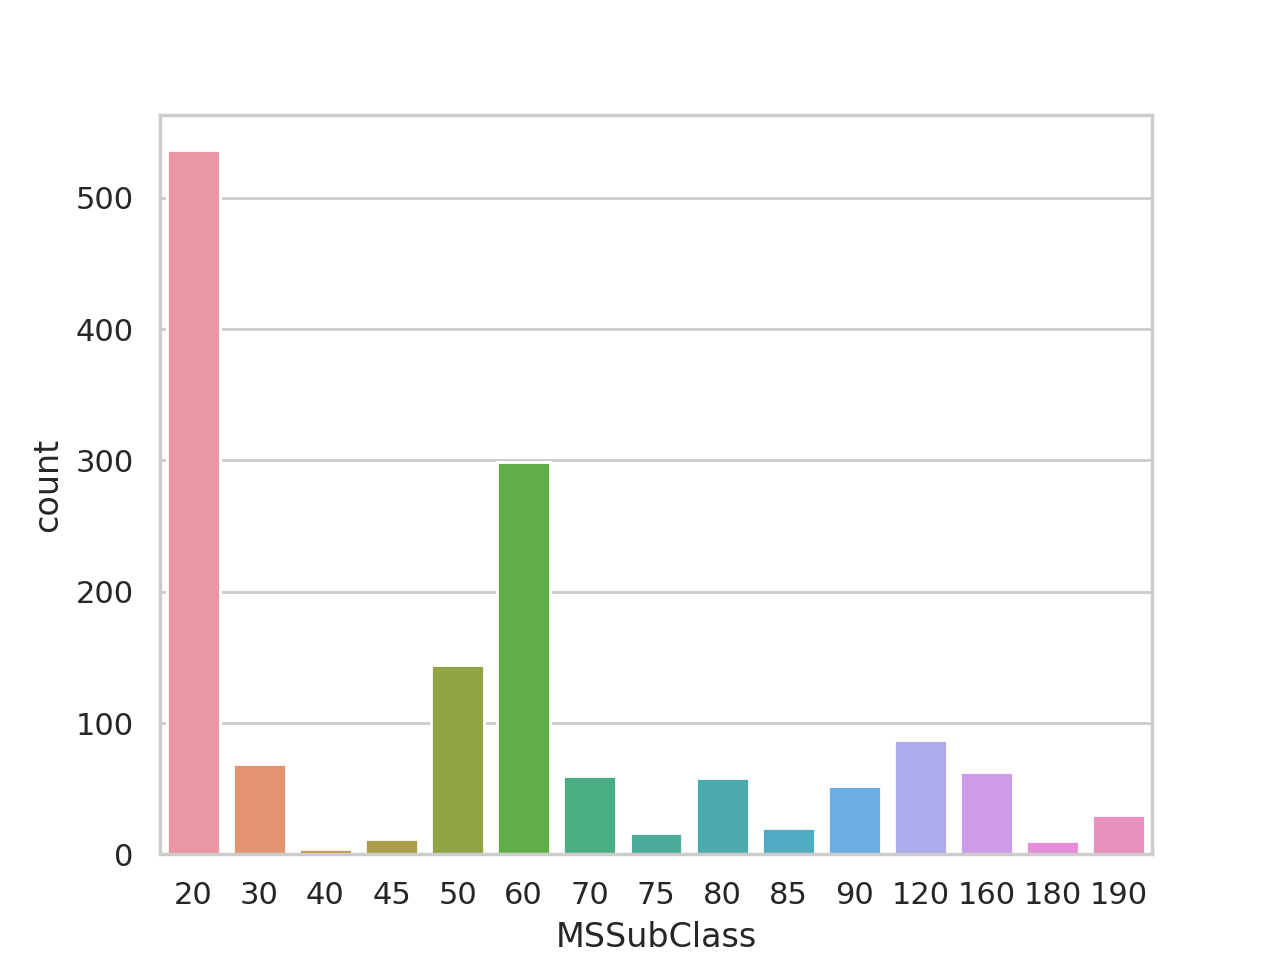

In [6]:
sns.countplot(df["MSSubClass"])

### MSZoning (범주형 변수)
- 판매와 관련된 구역 분류

       A	Agriculture (농업)
       C	Commercial (상업)
       FV	Floating Village Residential (수중 위에 있는 거주지역)
       I	Industrial (산업)
       RH	Residential High Density (높은 밀도의 주거지역)
       RL	Residential Low Density (낮은 밀도의 주거지역)
       RP	Residential Low Density Park (주거용 저밀도 공원)
       RM	Residential Medium Density (중간 정도 밀도의 주거지역)


<IPython.core.display.Javascript object>


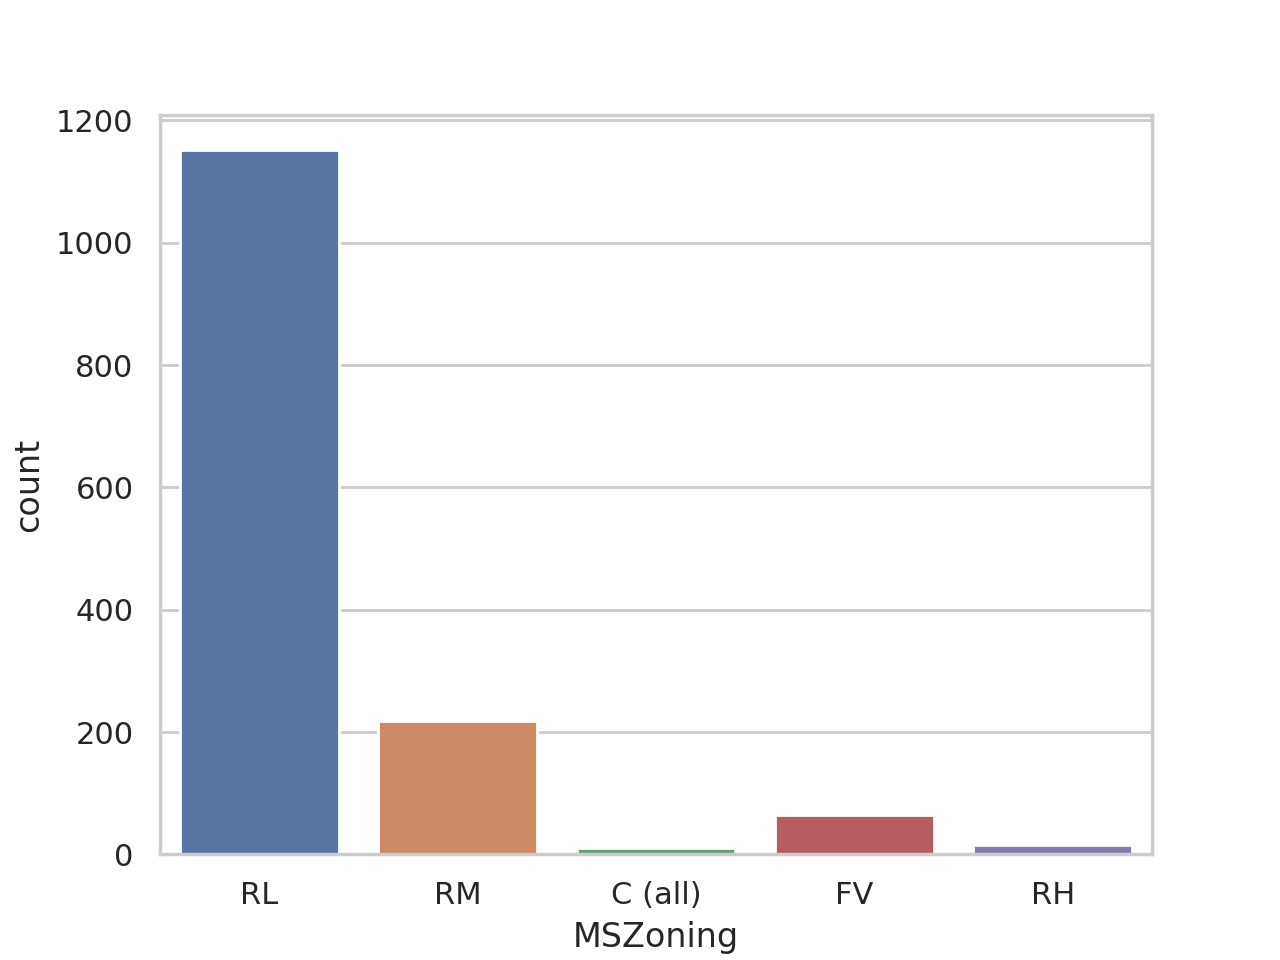

In [14]:
sns.countplot(df["MSZoning"])

### LotFrontage (연속형 변수)
- Linear feet of street connected to property
- 주거공간과 일반 도로 까지의 선형 거리

In [17]:
df["LotFrontage"].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

<IPython.core.display.Javascript object>


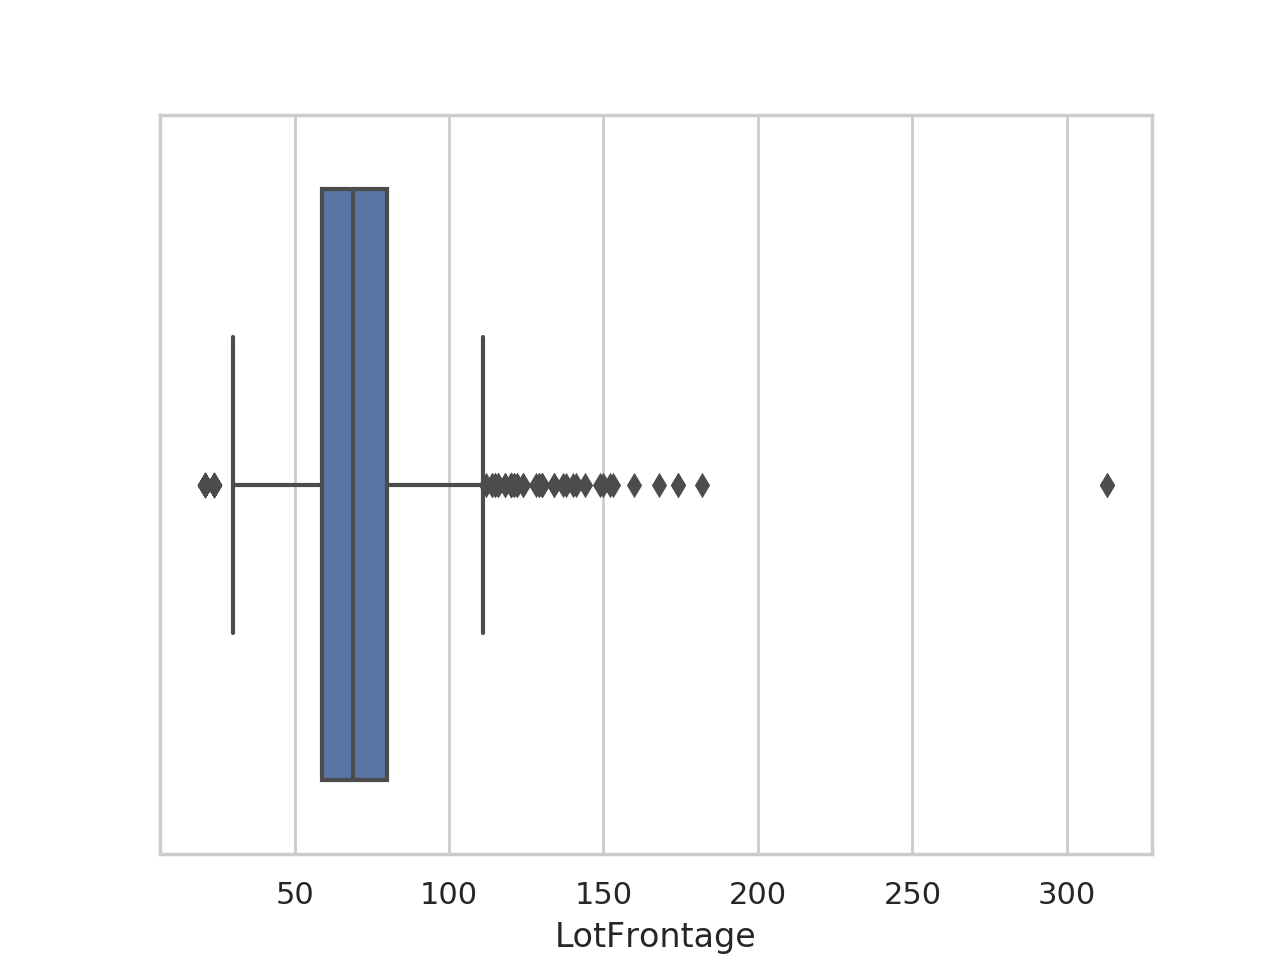

In [32]:
sns.boxplot(df["LotFrontage"])

In [ ]:
# df.fillna("0")

- 연속형 변수

In [60]:
str = "FstFlrSF, SndFlrSF, TSsnPorch, BedroomAbvGr, BsmtFinSF1, BsmtFinSF2, BsmtFullBath, BsmtHalfBath, BsmtUnfSF, EnclosedPorch, Fireplaces, FullBath, GarageArea, GarageCars, GarageYrBlt, GrLivArea, HalfBath, KitchenAbvGr, LotArea, LotFrontage, LowQualFinSF, MSSubClass, MasVnrArea, MiscVal, MoSold, OpenPorchSF, OverallCond, OverallQual, PoolArea, ScreenPorch, TotRmsAbvGrd, TotalBsmtSF, WoodDeckSF, YearBuilt, YearRemodAdd, YrSold"
str = str.split(",")

In [63]:
ls = []
for i in str:
    ls.append(i.strip())

In [64]:
ls

['FstFlrSF',
 'SndFlrSF',
 'TSsnPorch',
 'BedroomAbvGr',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtUnfSF',
 'EnclosedPorch',
 'Fireplaces',
 'FullBath',
 'GarageArea',
 'GarageCars',
 'GarageYrBlt',
 'GrLivArea',
 'HalfBath',
 'KitchenAbvGr',
 'LotArea',
 'LotFrontage',
 'LowQualFinSF',
 'MSSubClass',
 'MasVnrArea',
 'MiscVal',
 'MoSold',
 'OpenPorchSF',
 'OverallCond',
 'OverallQual',
 'PoolArea',
 'ScreenPorch',
 'TotRmsAbvGrd',
 'TotalBsmtSF',
 'WoodDeckSF',
 'YearBuilt',
 'YearRemodAdd',
 'YrSold']

In [2]:
len(str)

36

In [3]:
for i in range(len(str)):
    str[i] = str[i].strip()
    
quan = " + ".join(str)

- 범주형 변수

In [118]:
str = "Alley, BldgType, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, BsmtQual, CentralAir, Condition1, Condition2, Electrical, ExterCond, ExterQual, Exterior1st, Exterior2nd, Fence, FireplaceQu, Foundation, Functional, GarageCond, GarageFinish, GarageQual, GarageType, Heating, HeatingQC, HouseStyle, KitchenQual, LandContour, LandSlope, LotConfig, LotShape, MSZoning, MasVnrType, MiscFeature, Neighborhood, PavedDrive, PoolQC, RoofMatl, RoofStyle, SaleCondition, SaleType, Street, Utilities,"
str = str.split(",")
str = str[:-1]

In [119]:
len(str)

43

In [120]:
for i in range(len(str)):
    str[i] = "C(" + str[i].strip() + ")"

qual = " + ".join(str)

In [123]:
x = "SalePrice ~ " + quan + " + " + qual
# x = "SalePrice ~ " + quan + qual
x

'SalePrice ~ FstFlrSF + SndFlrSF + TSsnPorch + BedroomAbvGr + BsmtFinSF1 + BsmtFinSF2 + BsmtFullBath + BsmtHalfBath + BsmtUnfSF + EnclosedPorch + Fireplaces + FullBath + GarageArea + GarageCars + GarageYrBlt + GrLivArea + HalfBath + KitchenAbvGr + LotArea + LotFrontage + LowQualFinSF + MSSubClass + MasVnrArea + MiscVal + MoSold + OpenPorchSF + OverallCond + OverallQual + PoolArea + ScreenPorch + TotRmsAbvGrd + TotalBsmtSF + WoodDeckSF + YearBuilt + YearRemodAdd + YrSold + C(Alley) + C(BldgType) + C(BsmtCond) + C(BsmtExposure) + C(BsmtFinType1) + C(BsmtFinType2) + C(BsmtQual) + C(CentralAir) + C(Condition1) + C(Condition2) + C(Electrical) + C(ExterCond) + C(ExterQual) + C(Exterior1st) + C(Exterior2nd) + C(Fence) + C(FireplaceQu) + C(Foundation) + C(Functional) + C(GarageCond) + C(GarageFinish) + C(GarageQual) + C(GarageType) + C(Heating) + C(HeatingQC) + C(HouseStyle) + C(KitchenQual) + C(LandContour) + C(LandSlope) + C(LotConfig) + C(LotShape) + C(MSZoning) + C(MasVnrType) + C(MiscFeat

In [6]:
from statsmodels.formula.api import ols

fit = ols(x, data=df).fit() 

In [7]:
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     135.7
Date:                Fri, 26 Oct 2018   Prob (F-statistic):               0.00
Time:                        17:13:11   Log-Likelihood:                -13358.
No. Observations:                1121   AIC:                         2.679e+04
Df Residuals:                    1086   BIC:                         2.696e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -3.232e+05    1.7e+06     -0.190      0.849   -3.66e+06    3.01e+06
FstFlrSF         14.2255      8.463      1.681      0.093      -2.379      30.830
SndFlrSF         14.9934      7.705      1.946      0.052      -0.124      30.111
TSsnPorch        34.5789     37.493      0.922      0.357     -38.989     108.146
BedroomAbvGr  -1.023e+04   2154.041     -4.750      0.000   -1.45e+04   -6005.947
BsmtFinSF1        9.7001      3.127      3.102      0.002       3.564      15.837
BsmtFinSF2        0.6725      5.585      0.120      0.904     -10.285      11.630
BsmtFullBath   8979.9920   3193.902      2.812      0.005    2713.076    1.52e+04
BsmtHalfBath   2490.1194   5070.958      0.491      0.623   -7459.864    1.24e+04
BsmtUnfSF        -2.6835      2.935     -0.914      0.361      -8.443       3.076
EnclosedPorch     7.2332     20.613      0.351      0.726     -33.213      47.680
Fireplaces     4374.8147   2187.857      2.000      0.046      81.910    8667.720
FullBath       5389.6373   3528.522      1.527      0.127   -1533.855    1.23e+04
GarageArea        6.4882     12.114      0.536      0.592     -17.281      30.257
GarageCars     1.679e+04   3486.683      4.815      0.000    9947.003    2.36e+04
GarageYrBlt     -49.1431     90.933     -0.540      0.589    -227.568     129.282
GrLivArea        31.6863      7.753      4.087      0.000      16.473      46.900
HalfBath      -1118.5234   3319.871     -0.337      0.736   -7632.610    5395.563
KitchenAbvGr  -2.193e+04   6704.402     -3.271      0.001   -3.51e+04   -8776.230
LotArea           0.5454      0.157      3.466      0.001       0.237       0.854
LotFrontage    -116.1232     61.241     -1.896      0.058    -236.288       4.041
LowQualFinSF      2.4674     20.902      0.118      0.906     -38.546      43.481
MSSubClass     -200.4890     34.486     -5.814      0.000    -268.155    -132.822
MasVnrArea       31.6049      7.006      4.511      0.000      17.858      45.352
MiscVal          -3.8501      6.955     -0.554      0.580     -17.497       9.797
MoSold         -224.0209    422.673     -0.530      0.596   -1053.369     605.327
OpenPorchSF      -2.3153     19.478     -0.119      0.905     -40.534      35.904
OverallCond    5227.2069   1367.084      3.824      0.000    2544.781    7909.632
OverallQual     1.87e+04   1478.416     12.646      0.000    1.58e+04    2.16e+04
PoolArea        -61.2618     29.842     -2.053      0.040    -119.817      -2.707
ScreenPorch      57.9661     20.399      2.842      0.005      17.941      97.991
TotRmsAbvGrd   5439.7807   1485.776      3.661      0.000    2524.464    8355.097
TotalBsmtSF       7.6891      4.221      1.822      0.069      -0.593      15.971
WoodDeckSF       21.5457     10.018      2.151      0.032       1.890      41.202
YearBuilt       316.9684     87.622      3.617   

In [12]:
df["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<IPython.core.display.Javascript object>


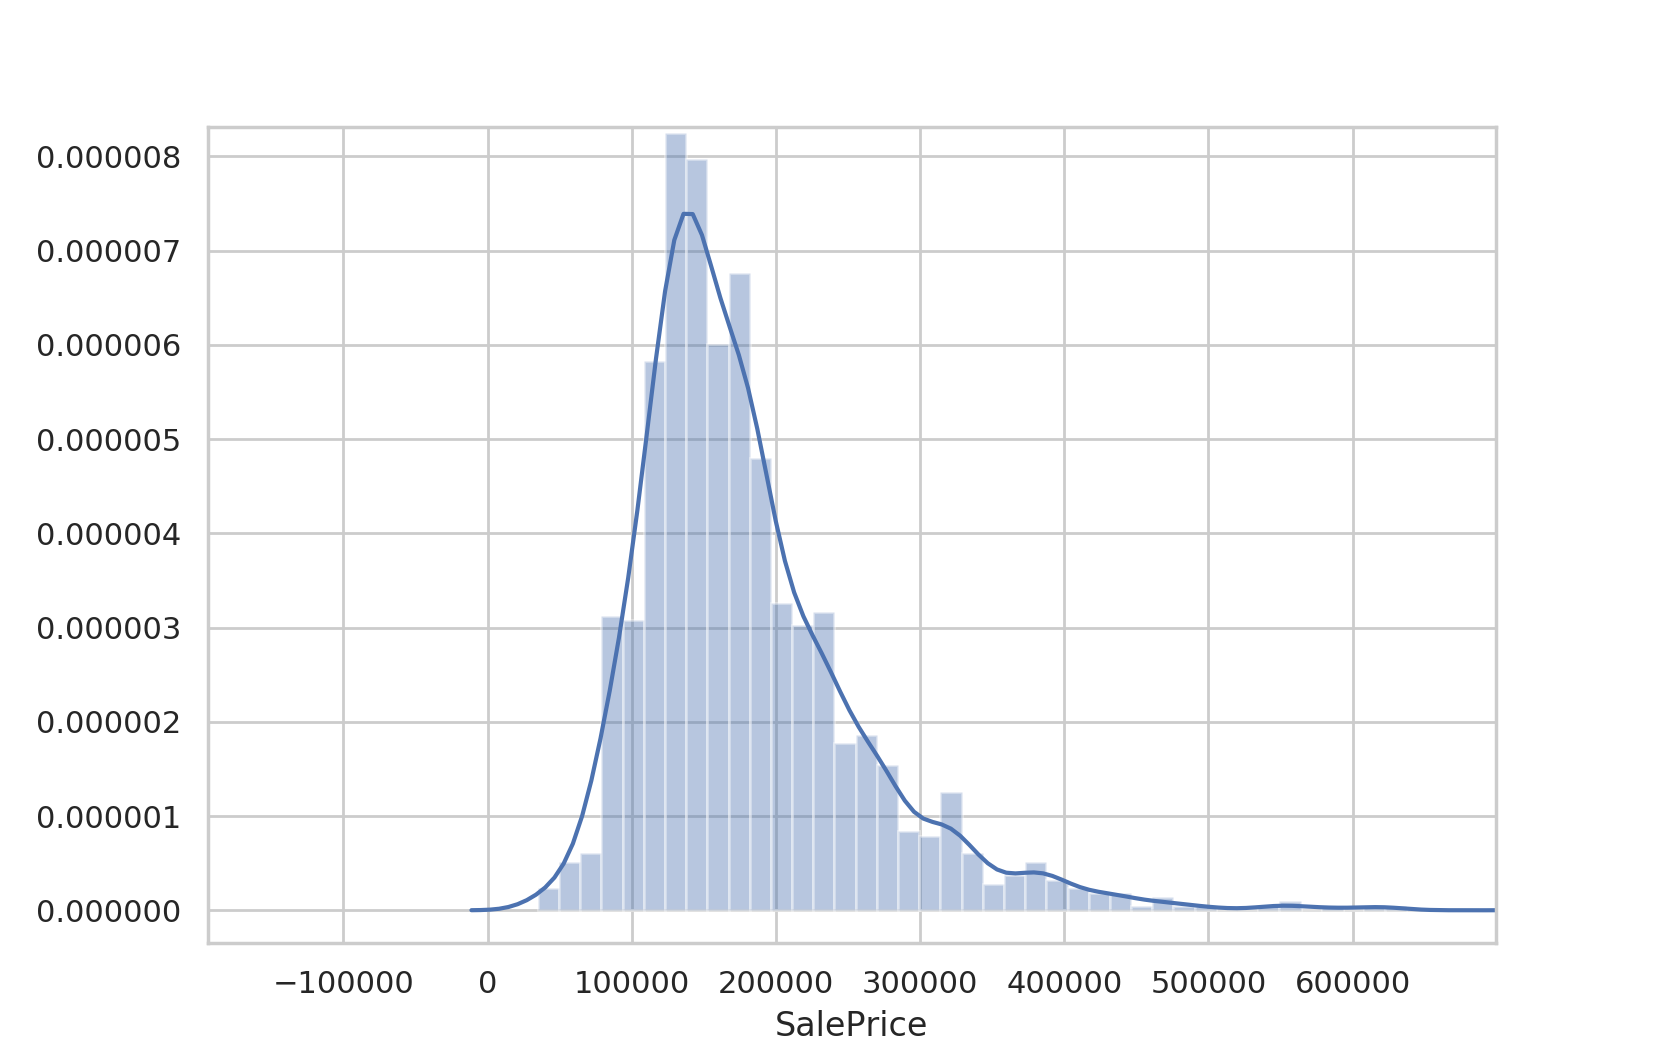

In [15]:
sns.distplot(df['SalePrice'])

<IPython.core.display.Javascript object>


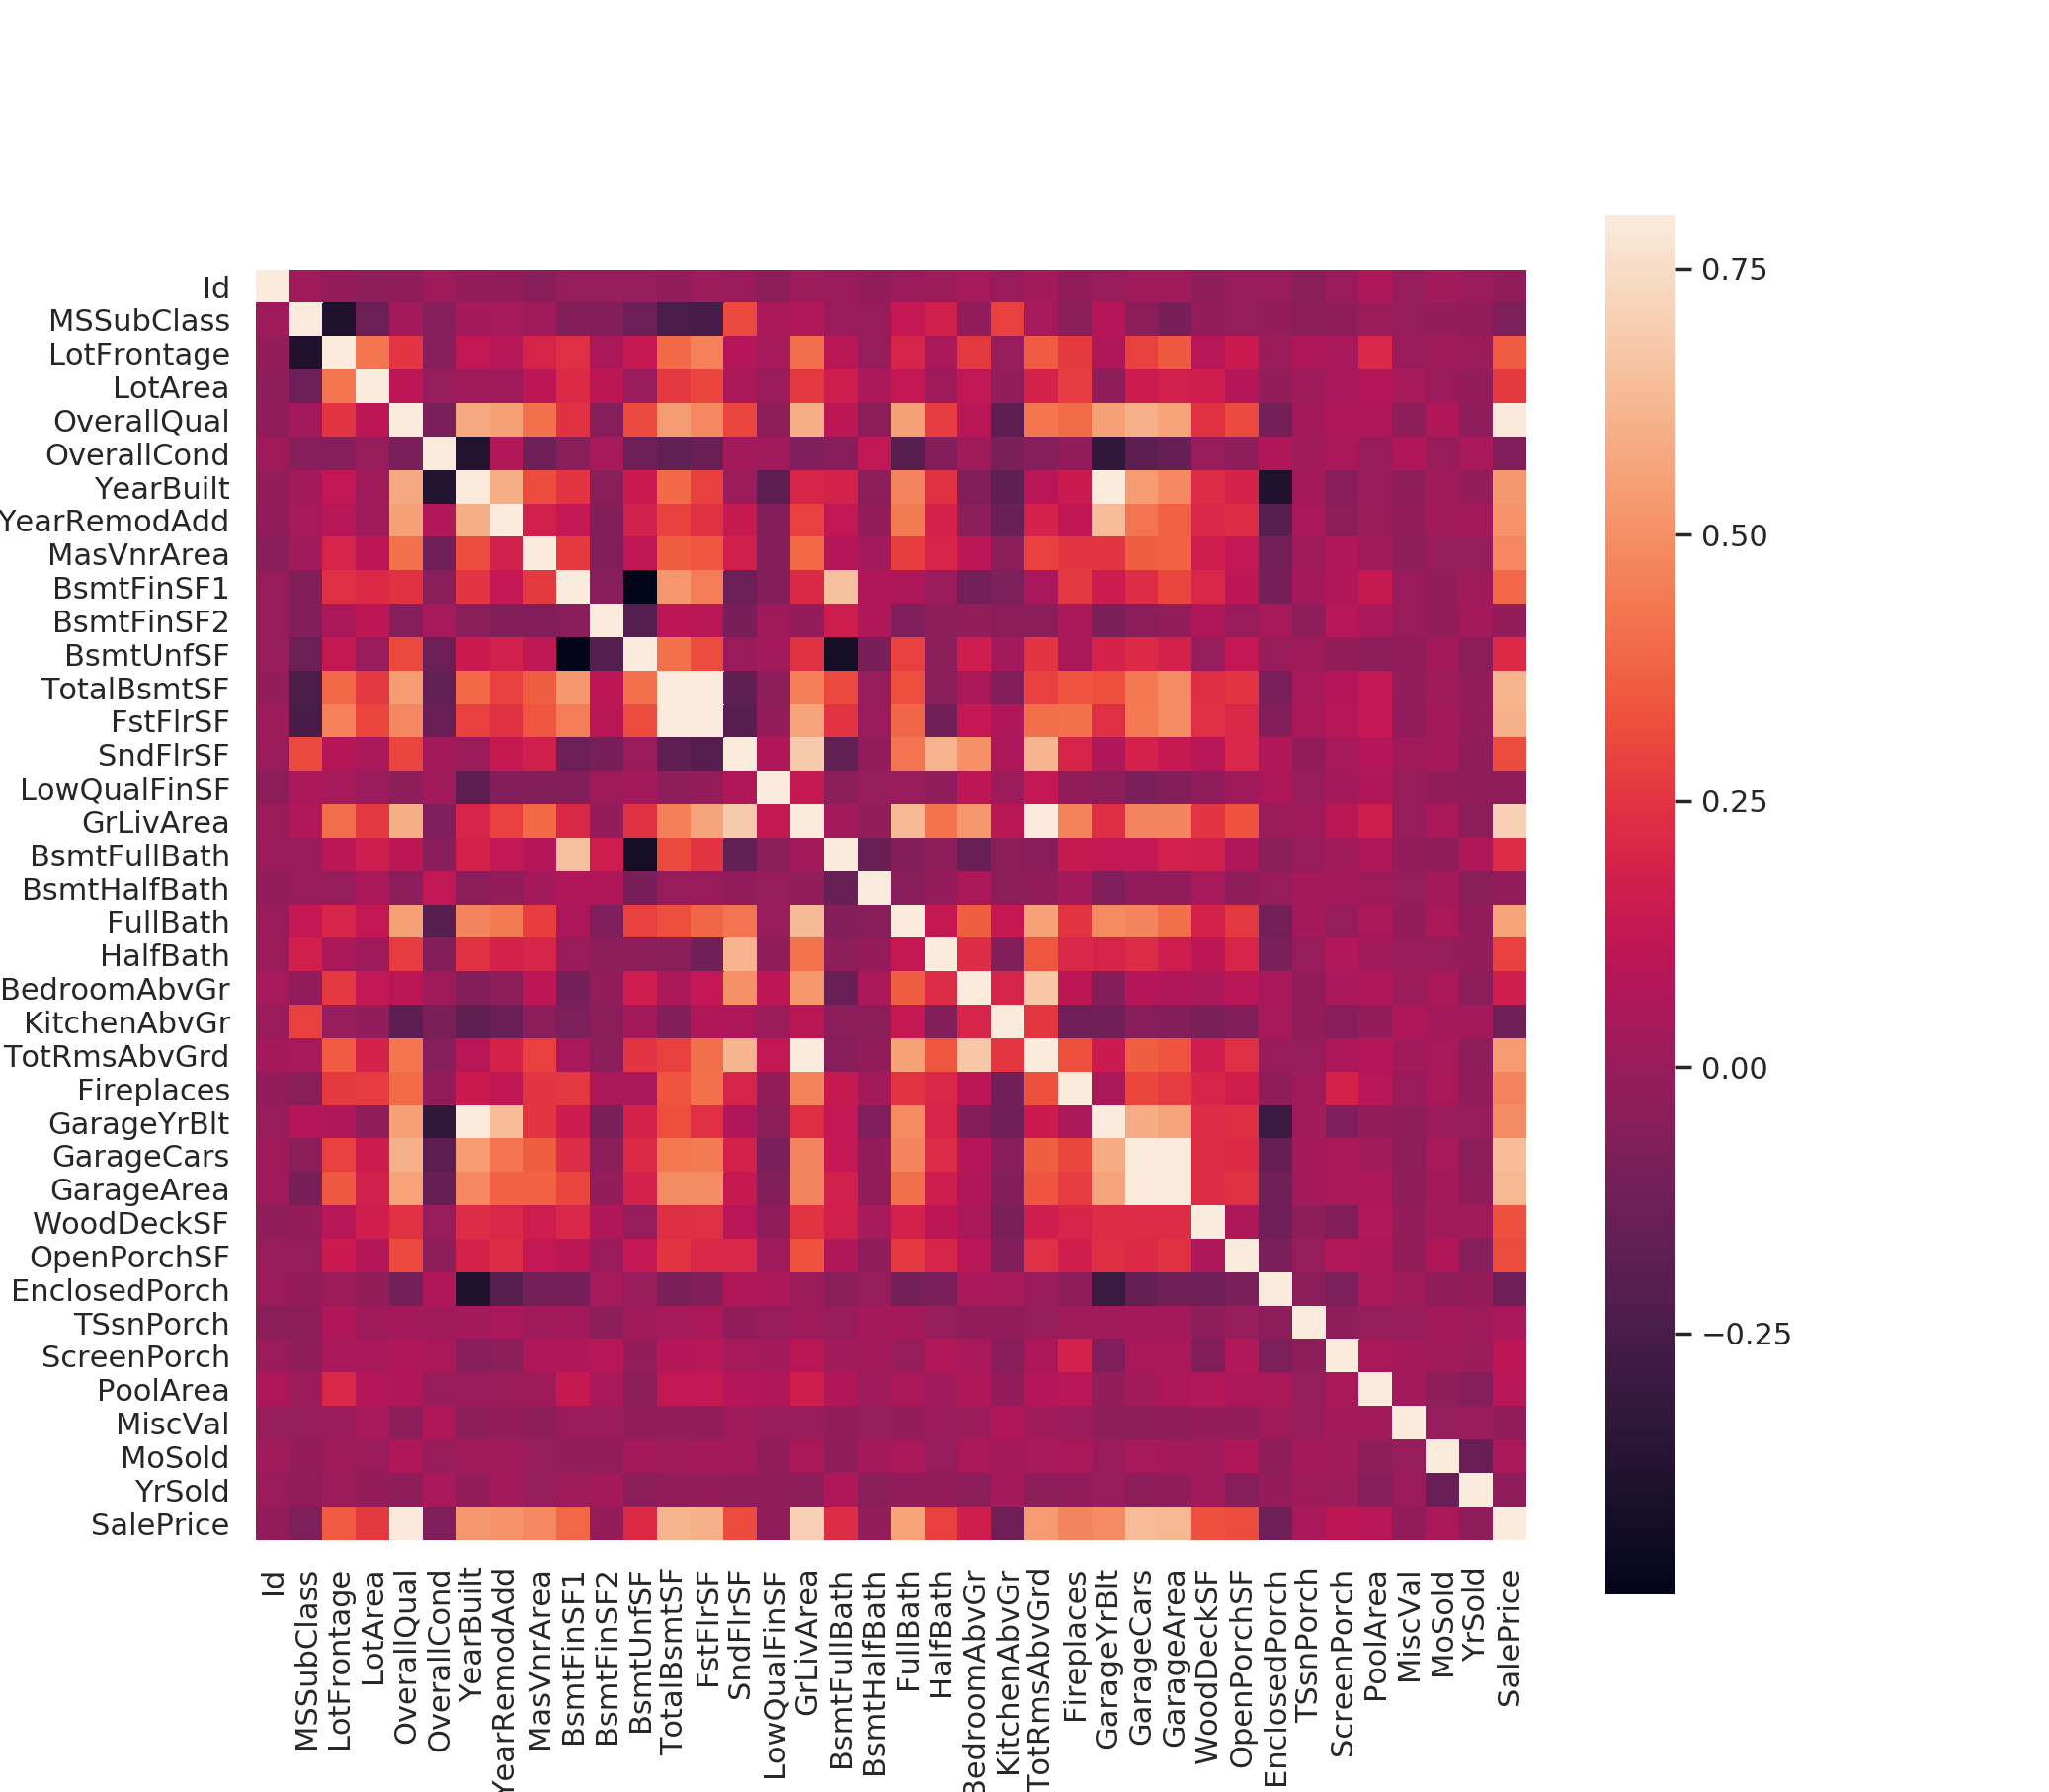

In [16]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

# NaN값 알아보기

In [22]:
missing = df.isnull().sum().sort_values(ascending=False)
missing[missing > 0]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

<IPython.core.display.Javascript object>


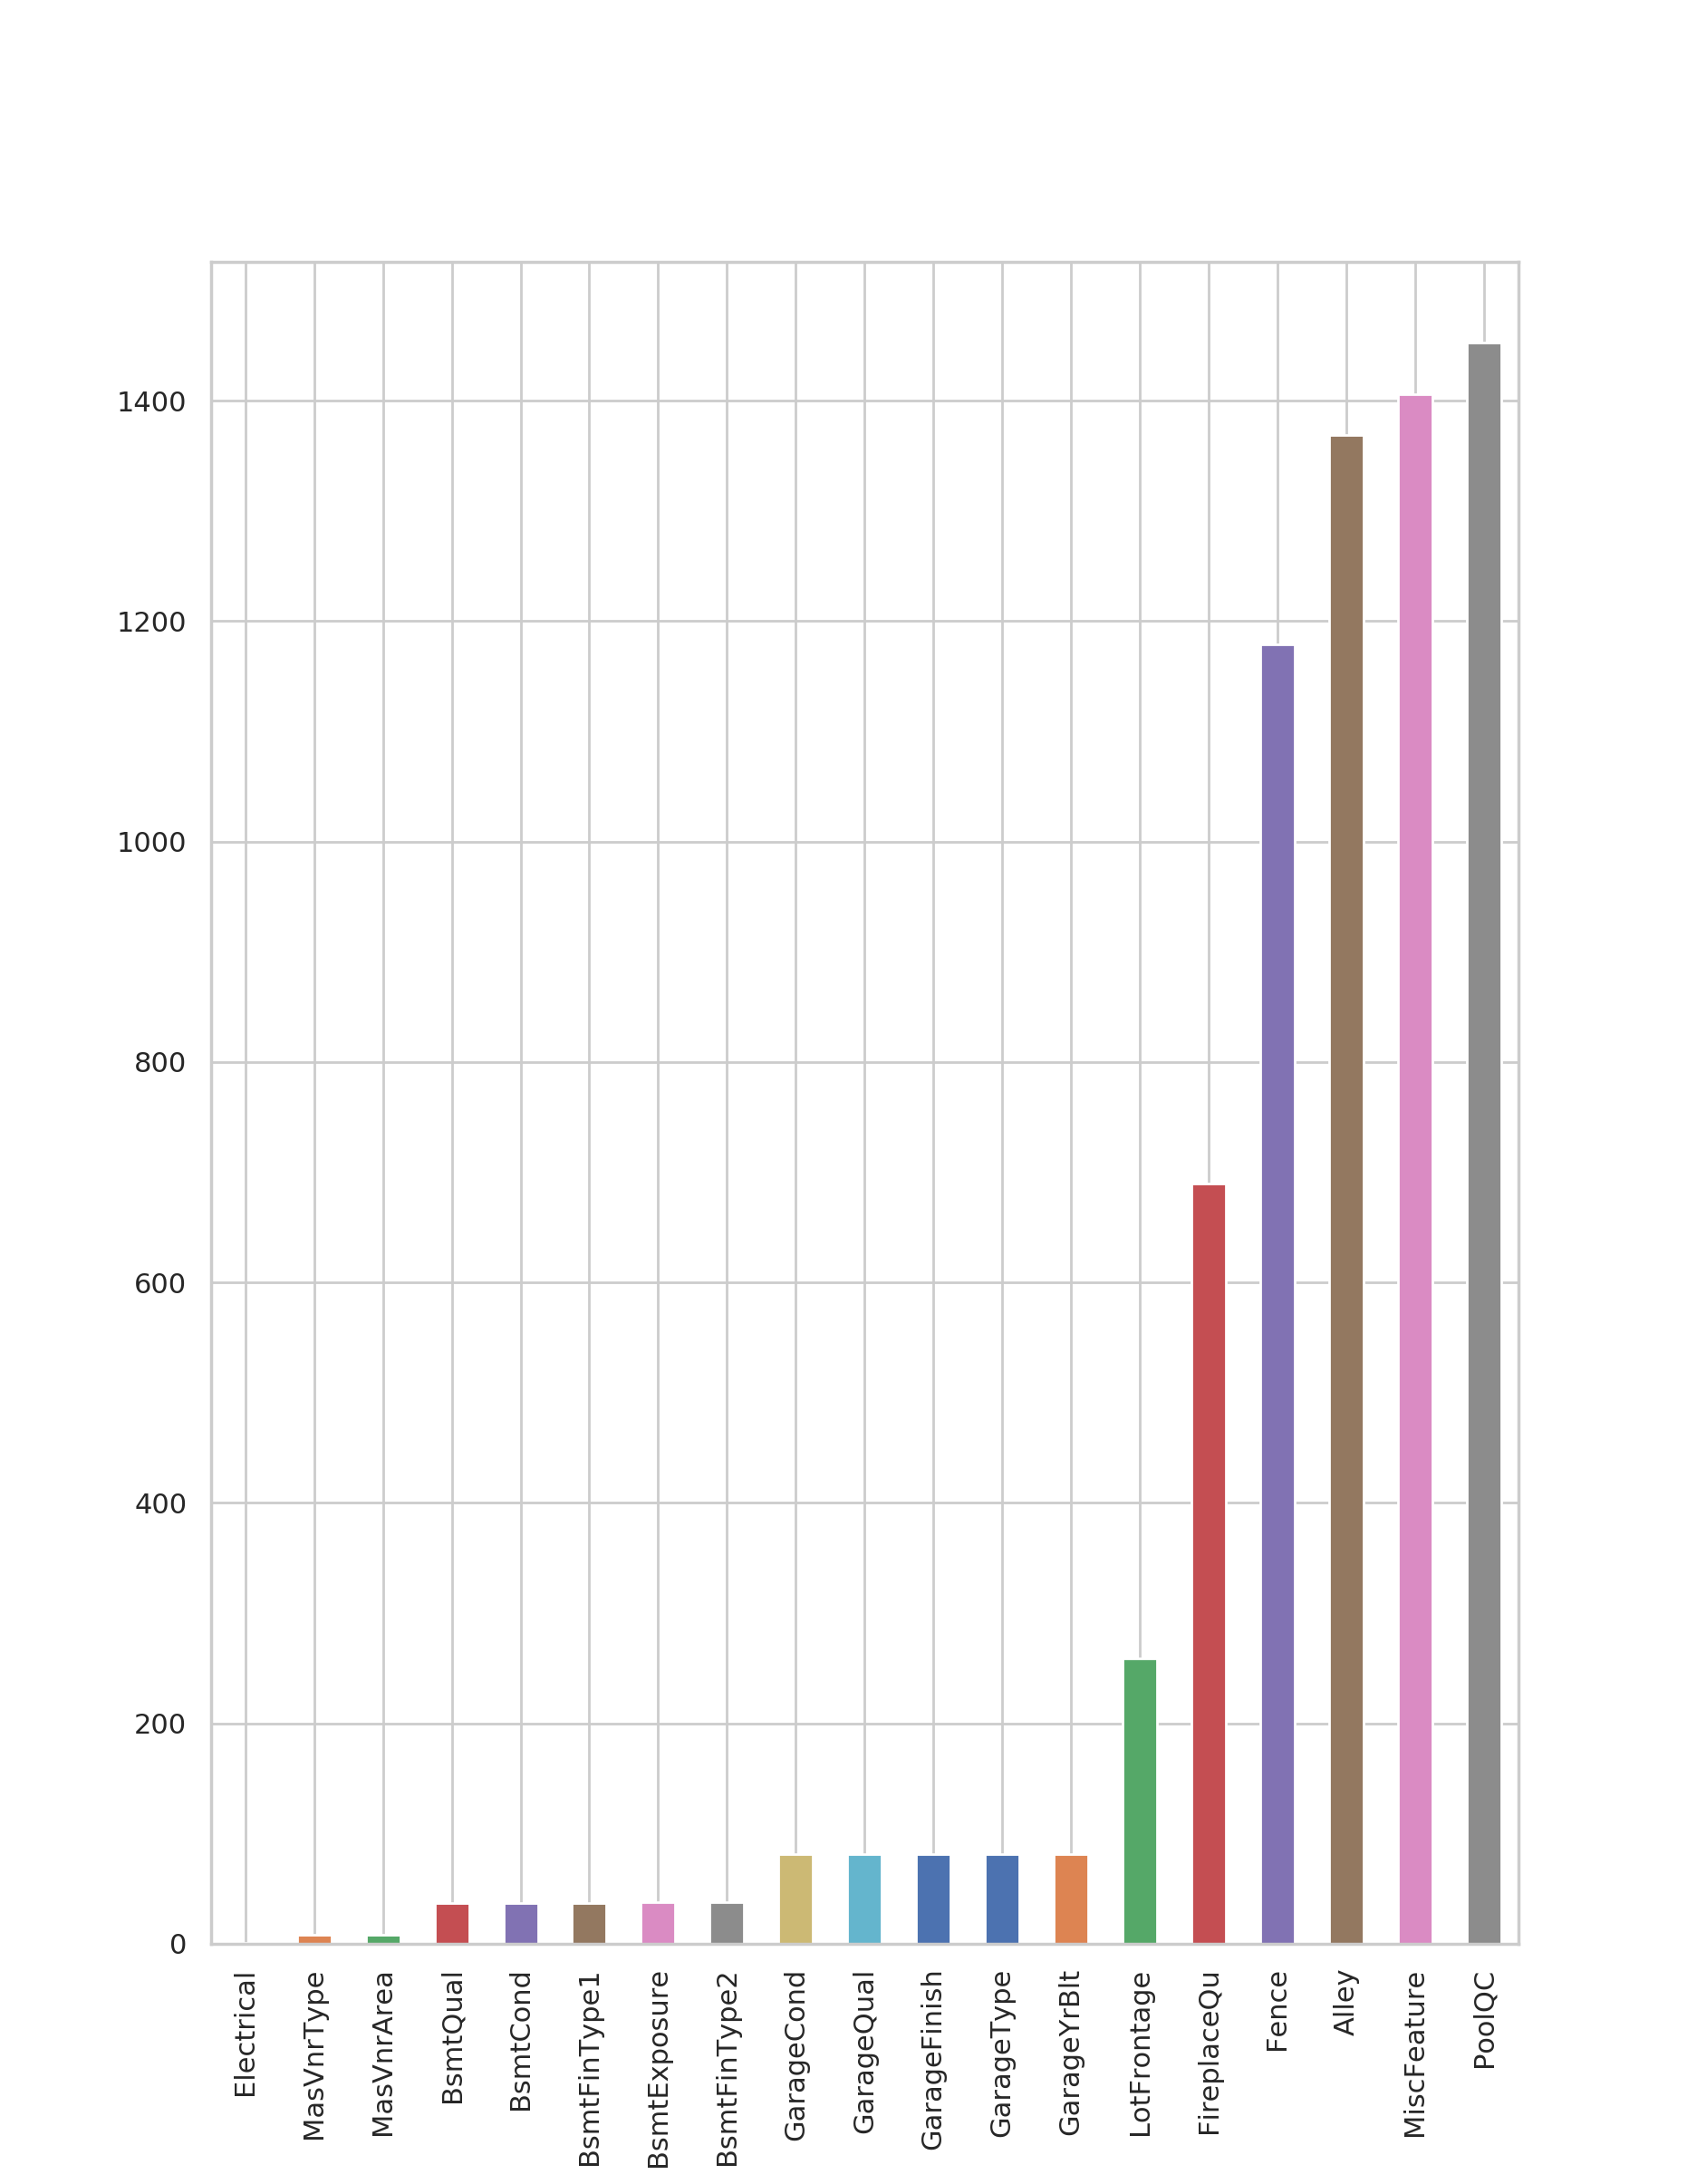

In [21]:
missing = df.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

# 범주형 데이터 분석

- Category 변수 값, plot 그리는 함수

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df = df.rename({"1stFlrSF": "FstFlrSF",
           "2ndFlrSF": "SndFlrSF", 
           "3SsnPorch": "TSsnPorch"}, axis = "columns")

In [3]:
def analysis(variable_name):
    name = variable_name
    variable_ls = list(df.groupby(name).size().index)
    variable = df[name].astype('category')
    if variable.isnull().sum():
        variable_ls.append('NaN')
        variable = variable.cat.set_categories(variable_ls)
        variable = variable.fillna('NaN')
    else:
        variable = variable.cat.set_categories(variable_ls)
    result = variable.value_counts()
    print(result)
    result.plot.bar()

### Alley
- 집까지의 골목길 유형
        Grvl: 자갈
        Pave: 포장길
        NA: 골목길이 없다.

NaN     1369
Grvl      50
Pave      41
Name: Alley, dtype: int64


<IPython.core.display.Javascript object>


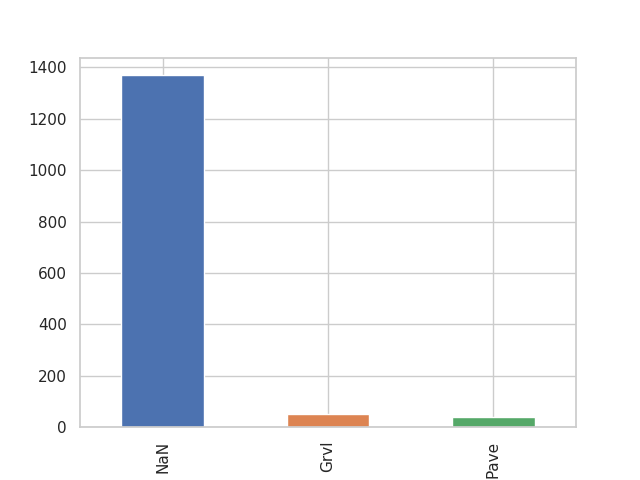

In [150]:
analysis('Alley')

### BldgType
- Type of dwelling 주거의 형태
       1Fam	Single-family Detached (단독 주택 분리됨)
       2FmCon	Two-family Conversion; originally built as one-family dwelling (원래 한 가족으로 지어졌지만, 두 가족으로 분리됨)
       Duplx	Duplex (복층아파트, 두 세대용 건물)
       TwnhsE	Townhouse End Unit (타운하우스 끝자락)
       TwnhsI	Townhouse Inside Unit (타운하우스 중심가)

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64


<IPython.core.display.Javascript object>


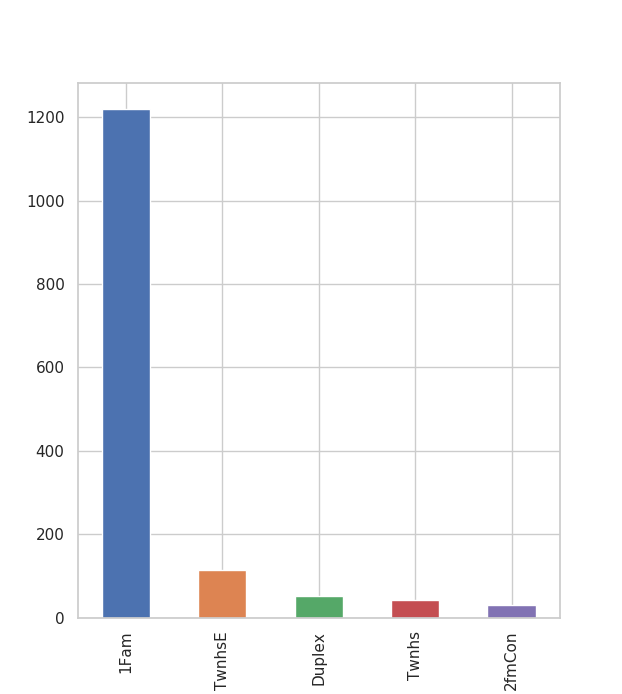

In [152]:
analysis("BldgType")

### BsmtCond
- Evaluates the general condition of the basement
- 지하실의 상태
       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement

TA     1311
Gd       65
Fa       45
NaN      37
Po        2
Name: BsmtCond, dtype: int64


<IPython.core.display.Javascript object>


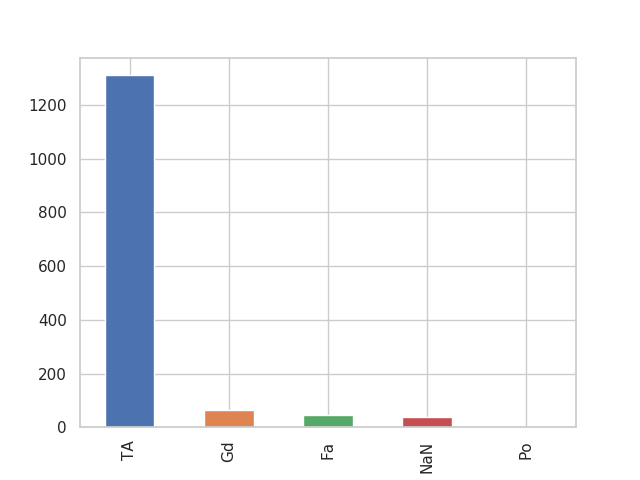

In [153]:
analysis('BsmtCond')

### BsmtExposure
- 외부로 연결된 지하실 안의 통로
       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement

No     953
Av     221
Gd     134
Mn     114
NaN     38
Name: BsmtExposure, dtype: int64


<IPython.core.display.Javascript object>


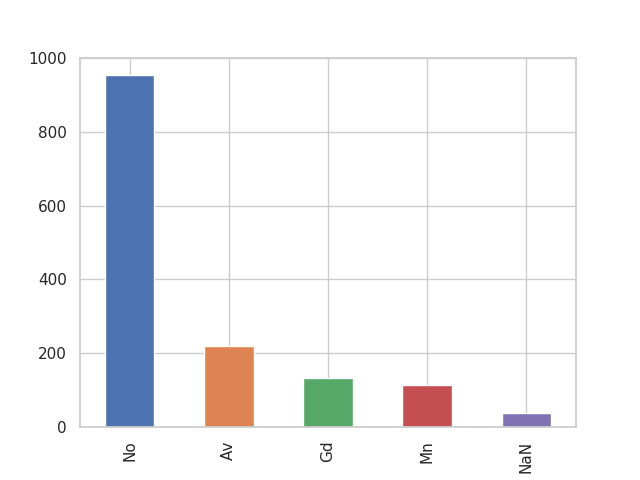

In [154]:
analysis('BsmtExposure')

### BsmtFinType1
- Rating of basement finished area
- 지하실 지대 완공 상태
       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
NaN     37
Name: BsmtFinType1, dtype: int64


<IPython.core.display.Javascript object>


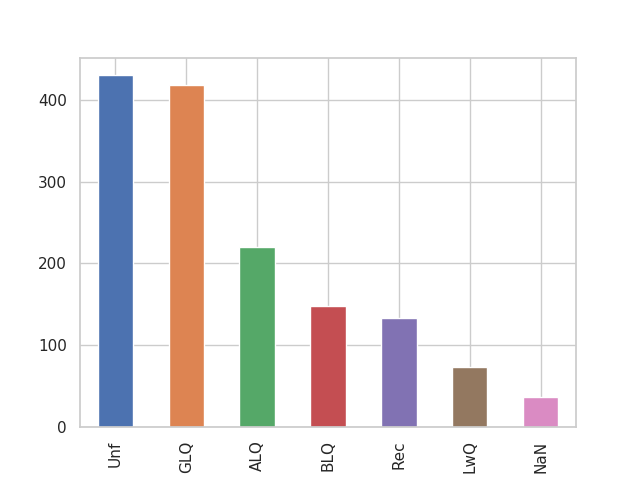

In [155]:
analysis('BsmtFinType1')

### BsmtFinType2
- Rating of basement finished area (if multiple types)
- 두가지 이상이면? 뭐에 관련된 변수인지 정확하게 모르겠다.
       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

Unf    1256
Rec      54
LwQ      46
NaN      38
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64


<IPython.core.display.Javascript object>


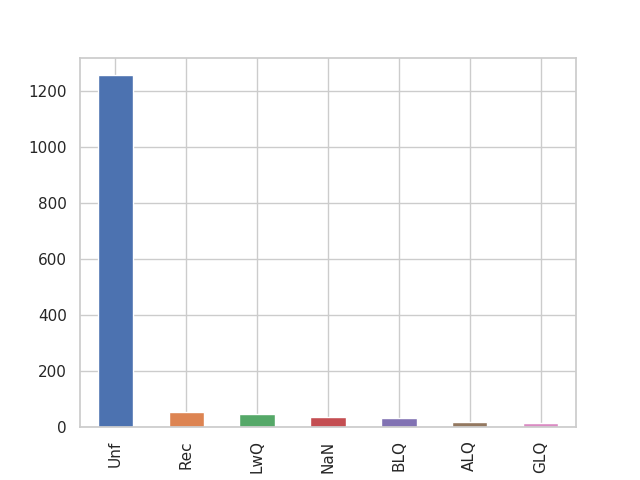

In [156]:
analysis('BsmtFinType2')

### BsmtQual
- Evaluates the height of the basement
- 지하실 높이
       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement

TA     649
Gd     618
Ex     121
NaN     37
Fa      35
Name: BsmtQual, dtype: int64


<IPython.core.display.Javascript object>


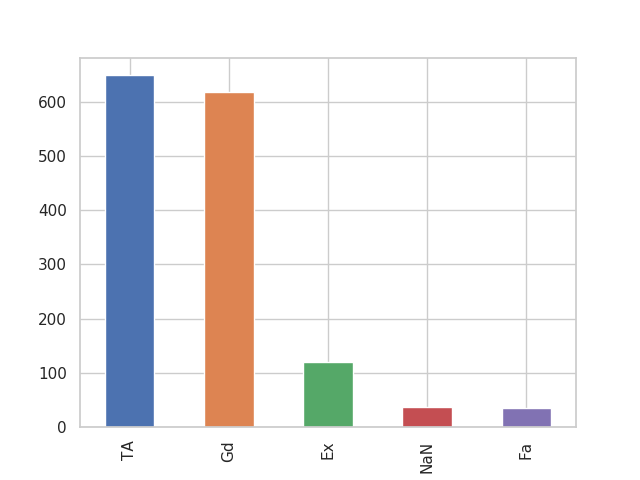

In [157]:
analysis('BsmtQual')

### CentralAir
- Central air conditioning
- 에어컨이 중앙 제어인지, 개별 제어인지
       N	No
       Y	Yes

Y    1365
N      95
Name: CentralAir, dtype: int64


<IPython.core.display.Javascript object>


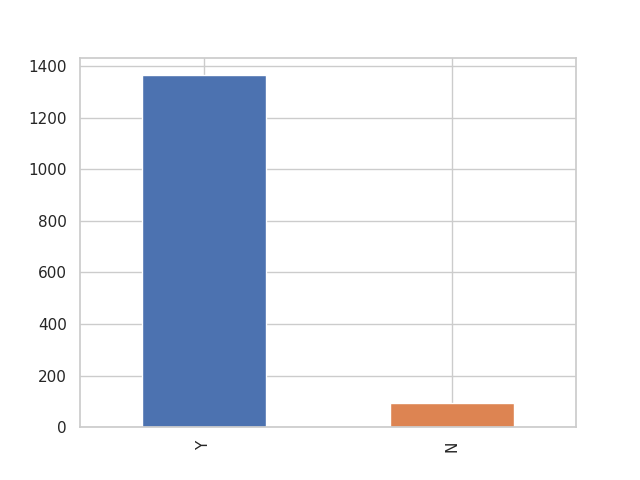

In [4]:
analysis("CentralAir")

###  Condition1
- Proximity to various conditions
- 근접 조건
       Artery	Adjacent to arterial street 간선 도로에 근접한
       Feedr	Adjacent to feeder street 피더 스트리트와 인접한
       Norm	Normal 보통
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64


<IPython.core.display.Javascript object>


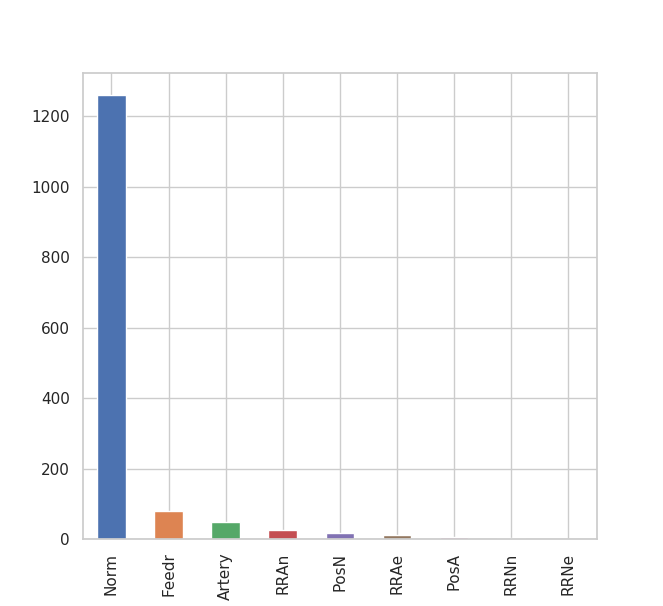

In [6]:
analysis("Condition1")

### Condition2
- Proximity to various conditions (if more than one is present)
- 근접 조건 2
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad

Norm      1445
Feedr        6
RRNn         2
PosN         2
Artery       2
RRAn         1
RRAe         1
PosA         1
Name: Condition2, dtype: int64


<IPython.core.display.Javascript object>


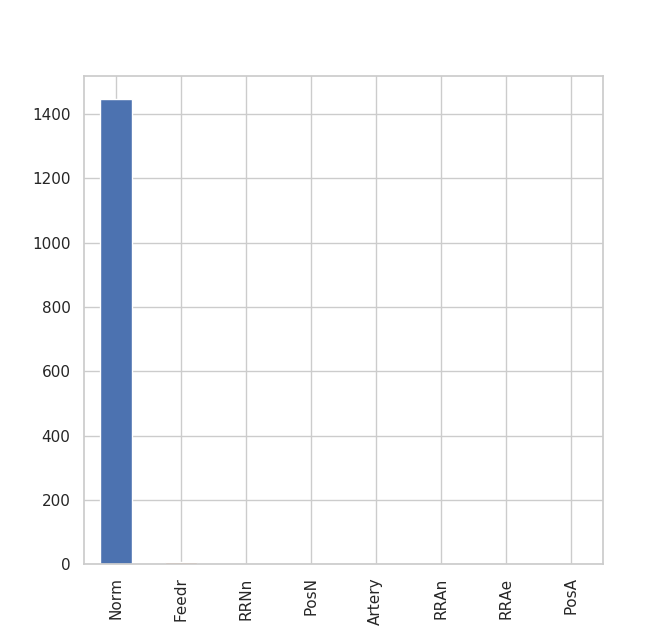

In [7]:
analysis("Condition2")

### Electrical
- Electrical system
       SBrkr	Standard Circuit Breakers & Romex 표준회로 차단기
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	평균
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair) 상위
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor) 하위
       Mix	Mixed

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
NaN         1
Mix         1
Name: Electrical, dtype: int64


<IPython.core.display.Javascript object>


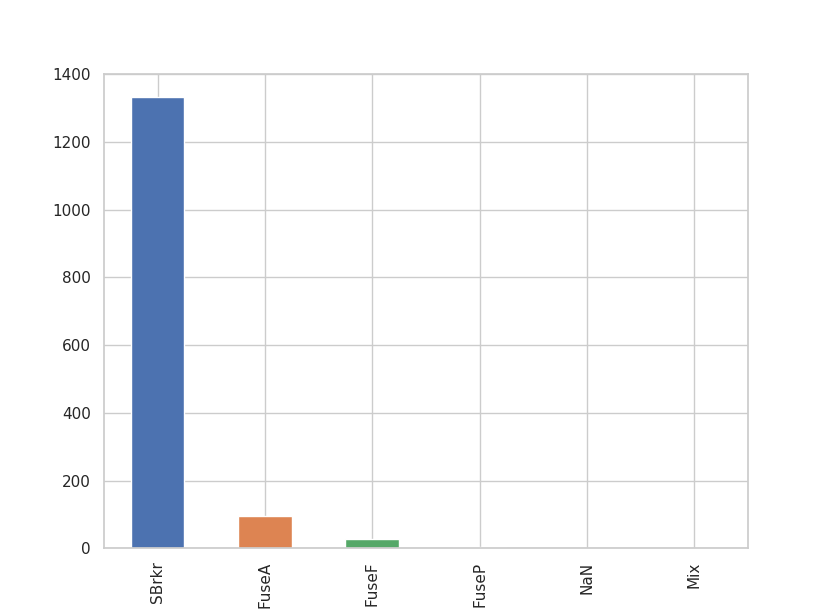

In [8]:
analysis("Electrical")

### ExterCond
- Evaluates the present condition of the material on the exterior
- 외관 상태
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64


<IPython.core.display.Javascript object>


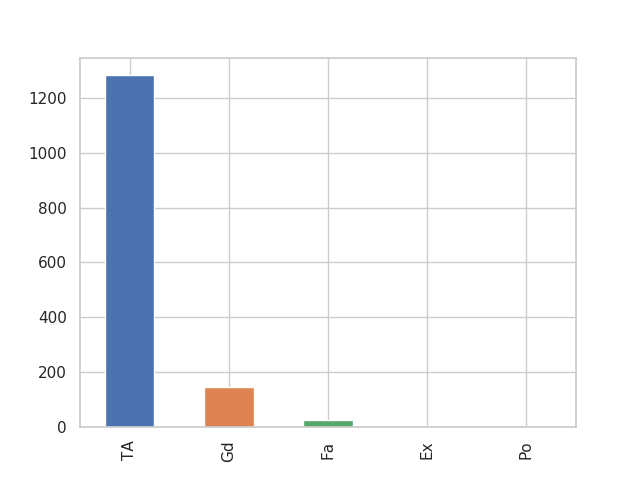

In [5]:
analysis("ExterCond")

### ExterQual
- Evaluates the quality of the material on the exterior
- 외관 재료의 상태
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64


<IPython.core.display.Javascript object>


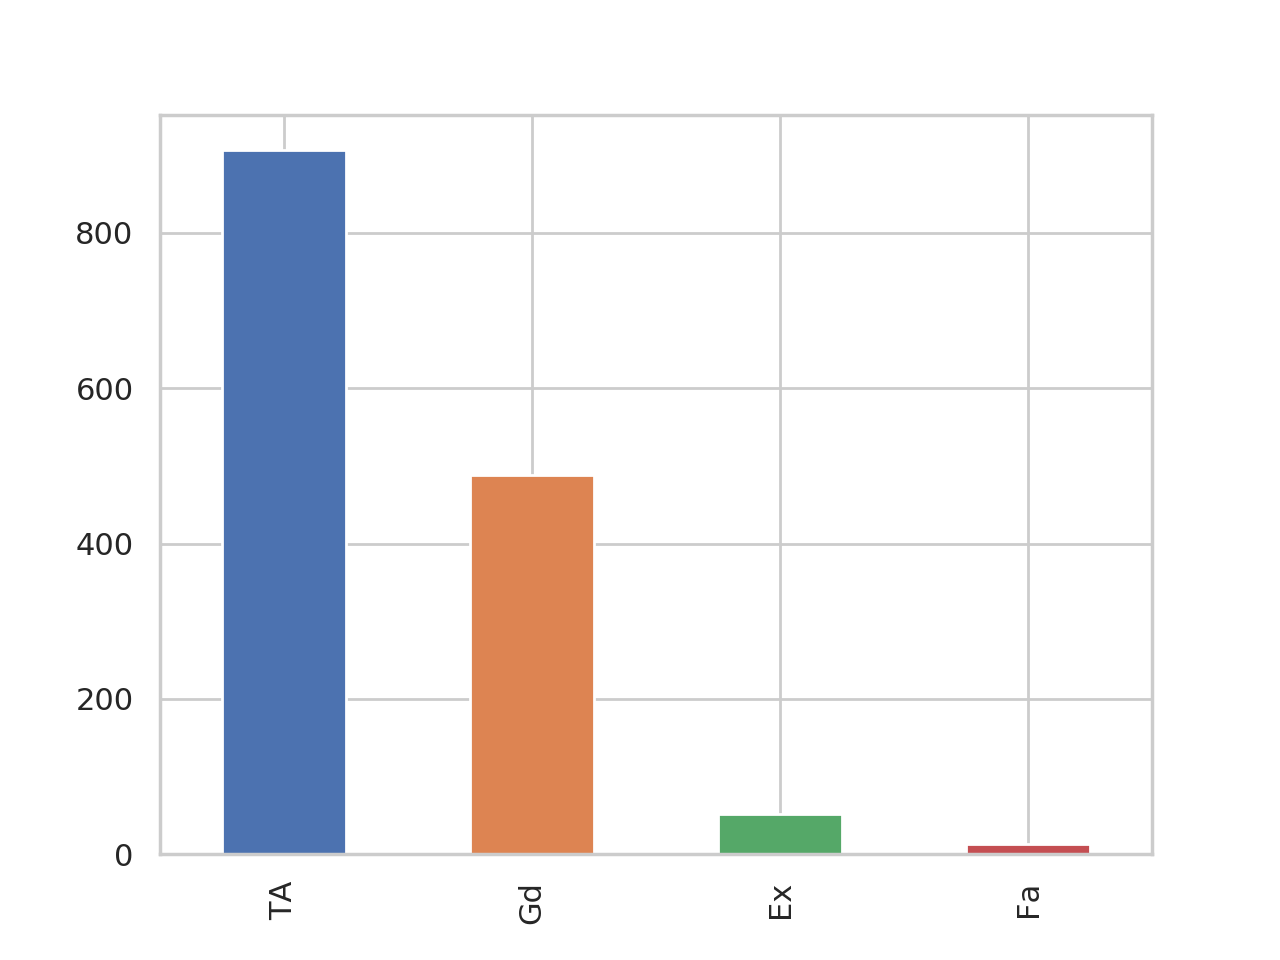

In [4]:
analysis('ExterQual')

### Exterior1st
- Exterior covering on house
- 집 외관 자재
       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
Stone        2
BrkComm      2
ImStucc      1
CBlock       1
AsphShn      1
Name: Exterior1st, dtype: int64


<IPython.core.display.Javascript object>


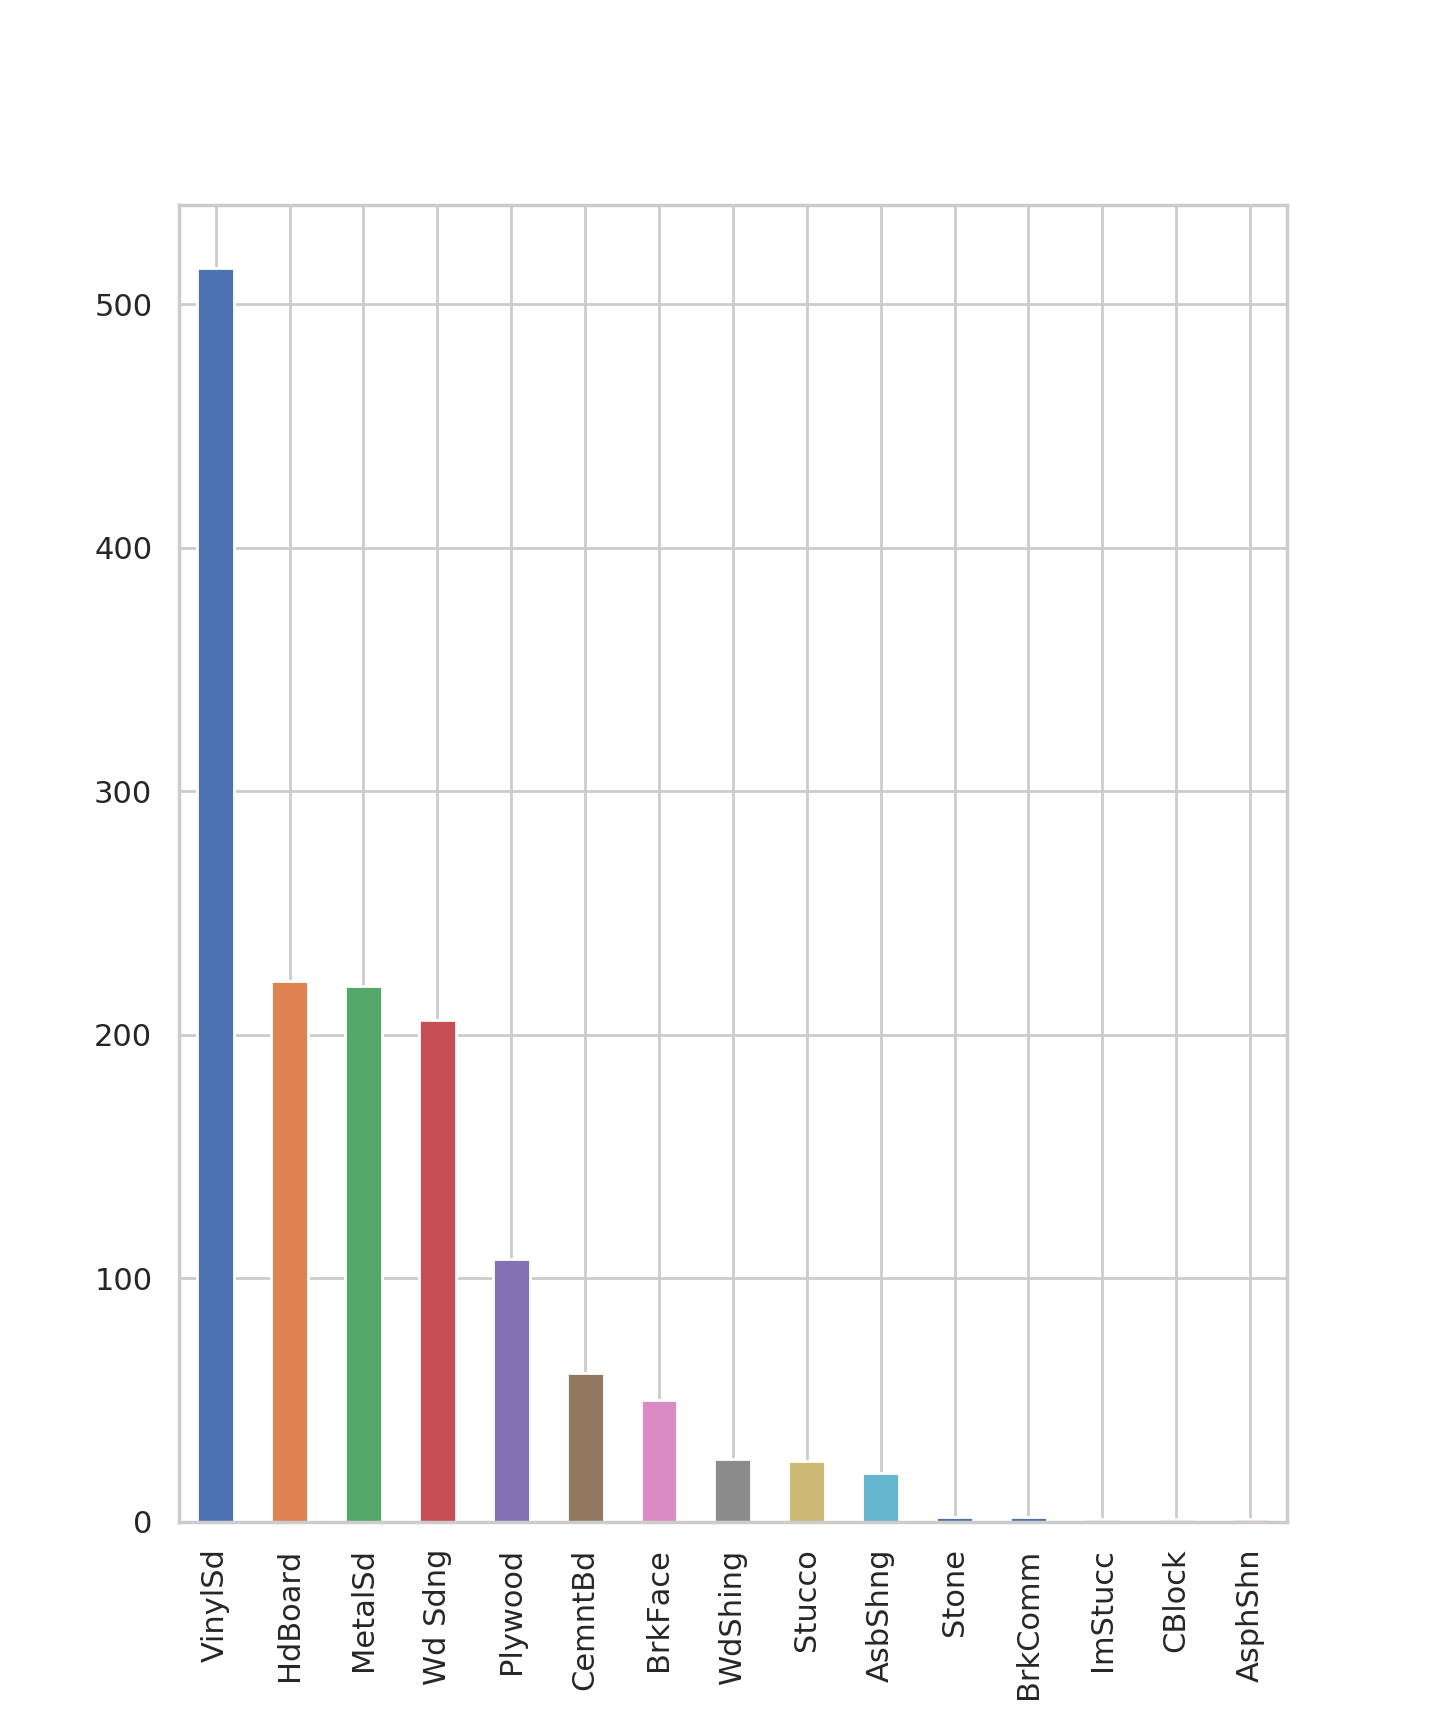

In [5]:
analysis("Exterior1st")

### Exterior2nd
- Exterior covering on house (if more than one material)
       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64


<IPython.core.display.Javascript object>


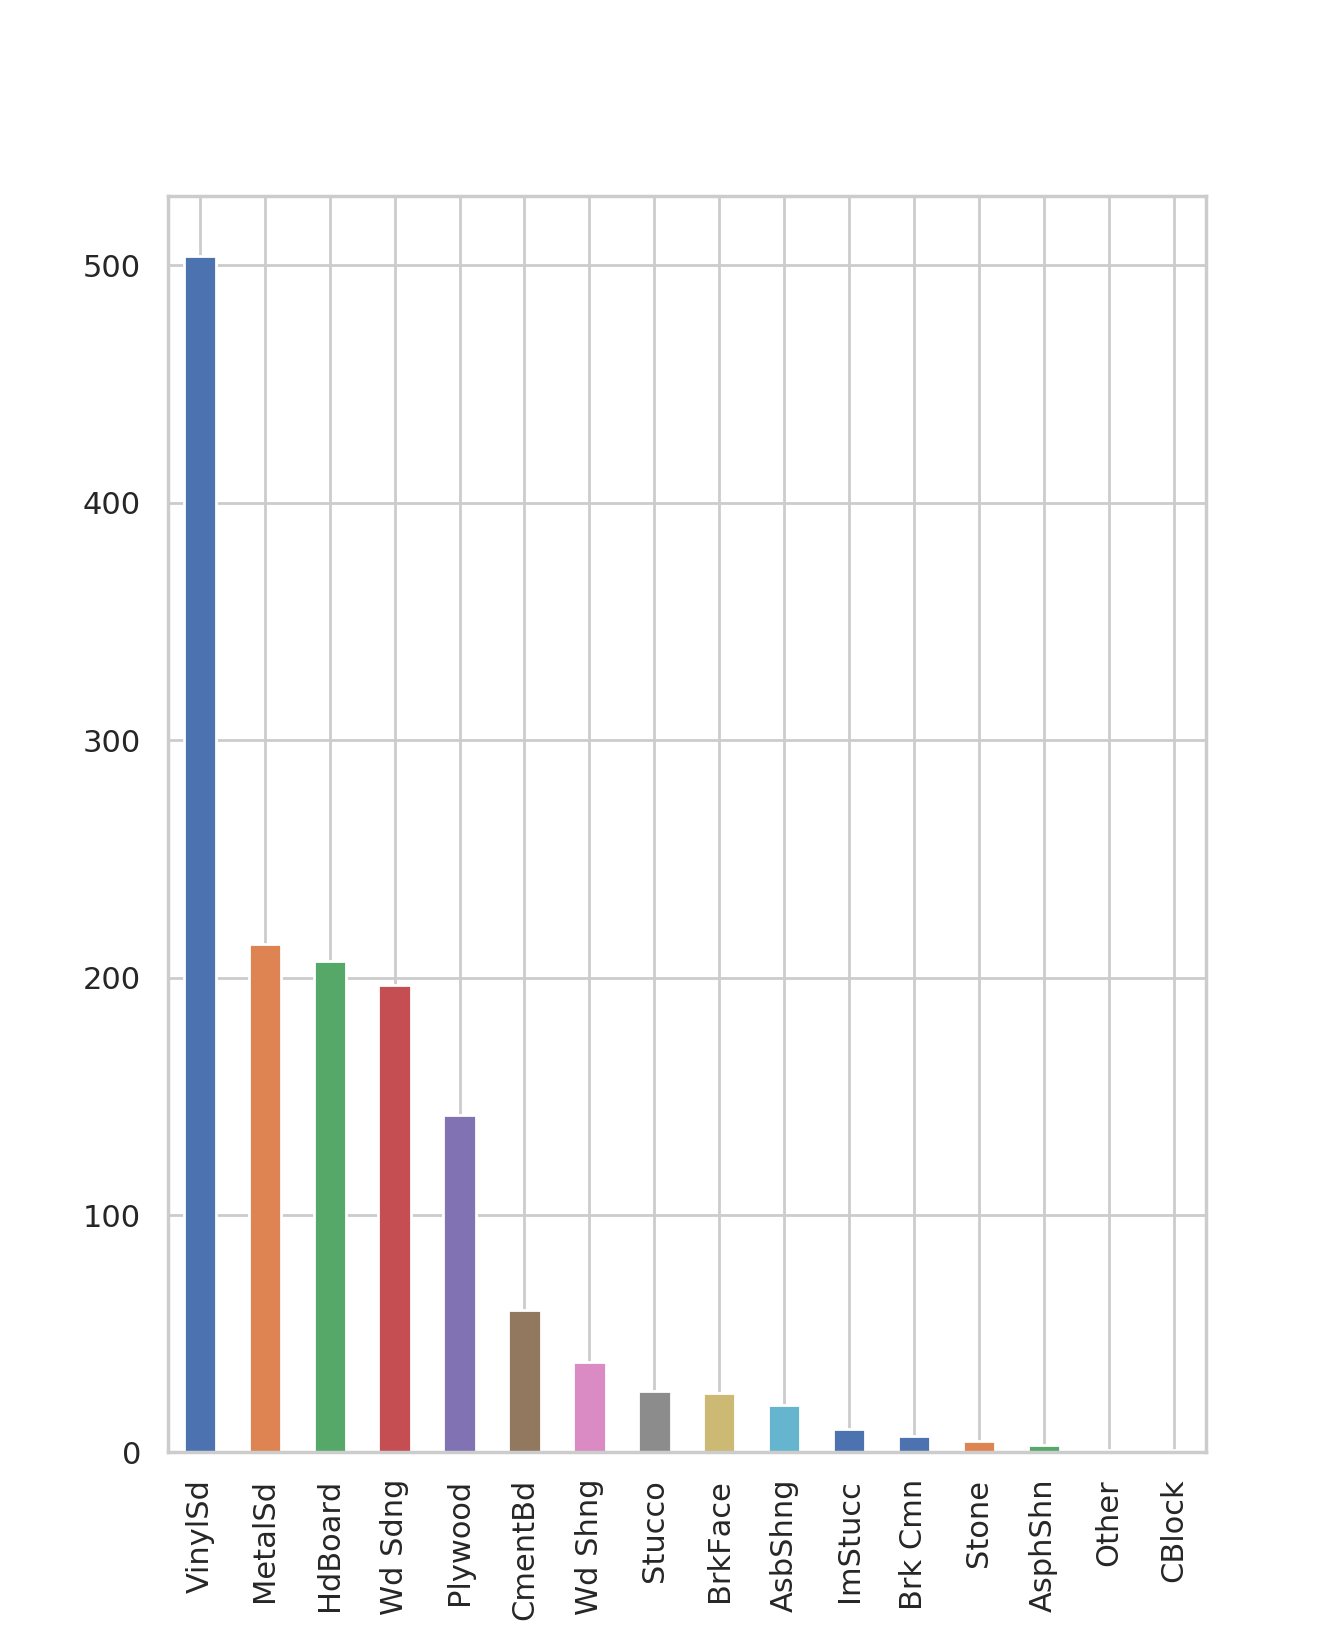

In [17]:
analysis("Exterior2nd")

### Fence
- Fence quality
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence

NaN      1179
MnPrv     157
GdPrv      59
GdWo       54
MnWw       11
Name: Fence, dtype: int64


<IPython.core.display.Javascript object>


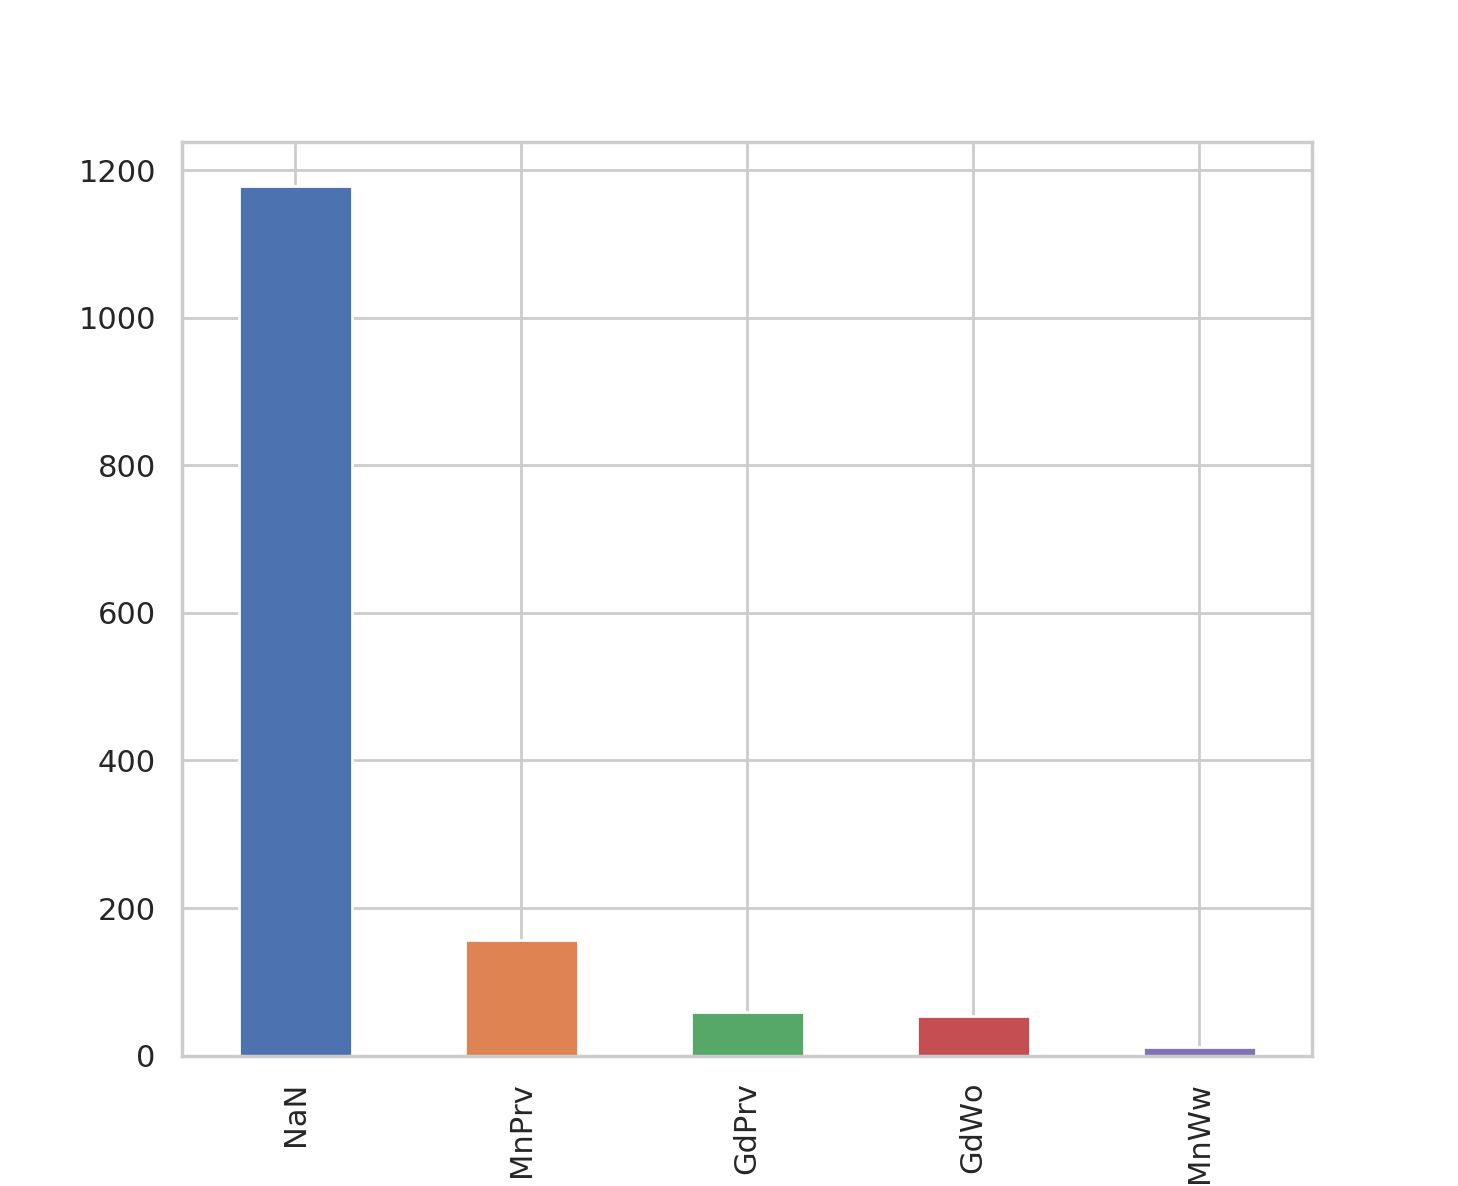

In [19]:
analysis("Fence")

### FireplaceQu
- Fireplace quality
- 벽난로 상태
       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry

NaN    690
Gd     380
TA     313
Fa      33
Ex      24
Po      20
Name: FireplaceQu, dtype: int64


<IPython.core.display.Javascript object>


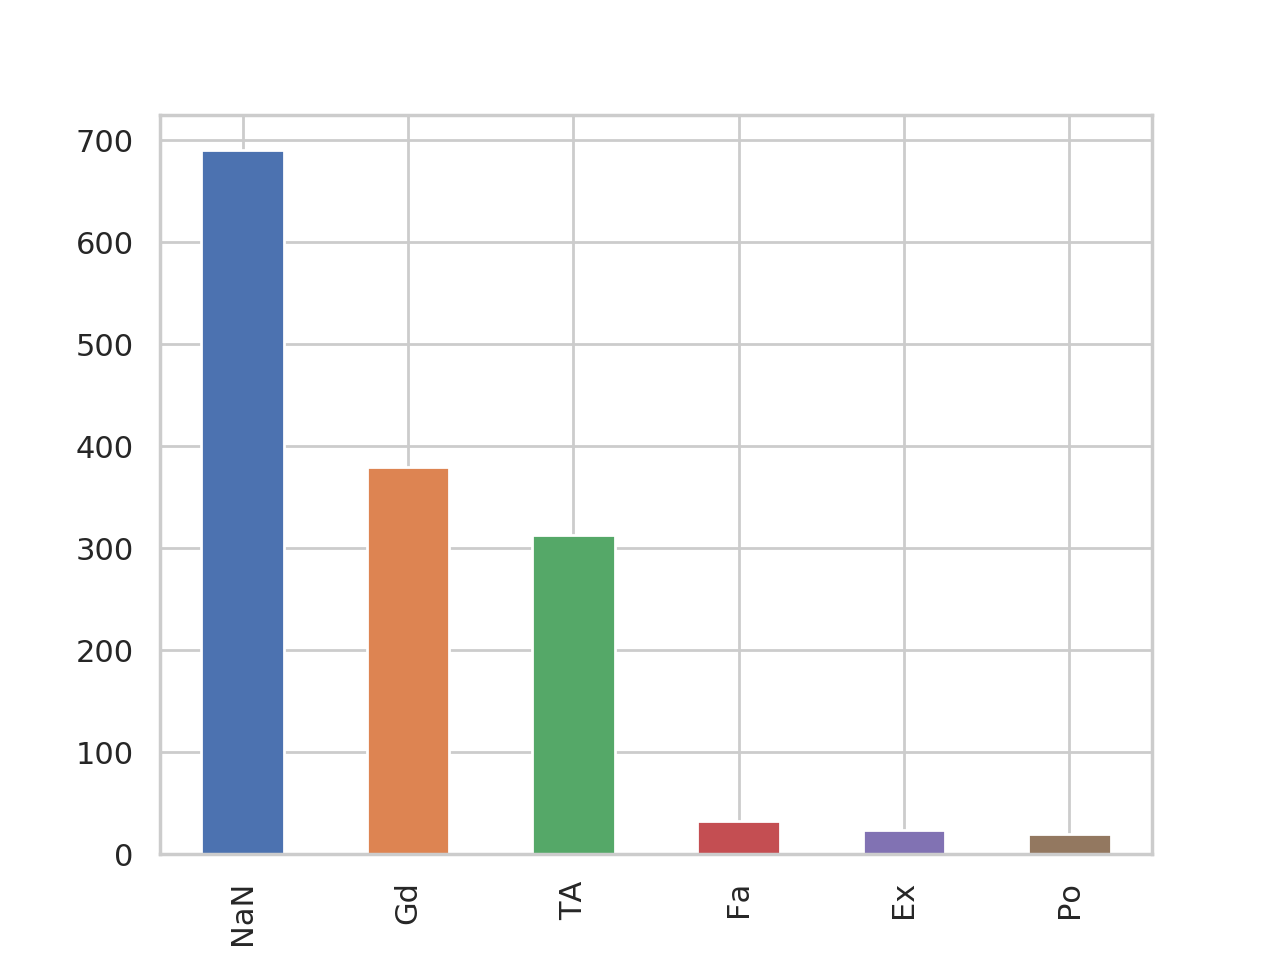

In [20]:
analysis("FireplaceQu")

### Foundation
- Type of foundation
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood

PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64


<IPython.core.display.Javascript object>


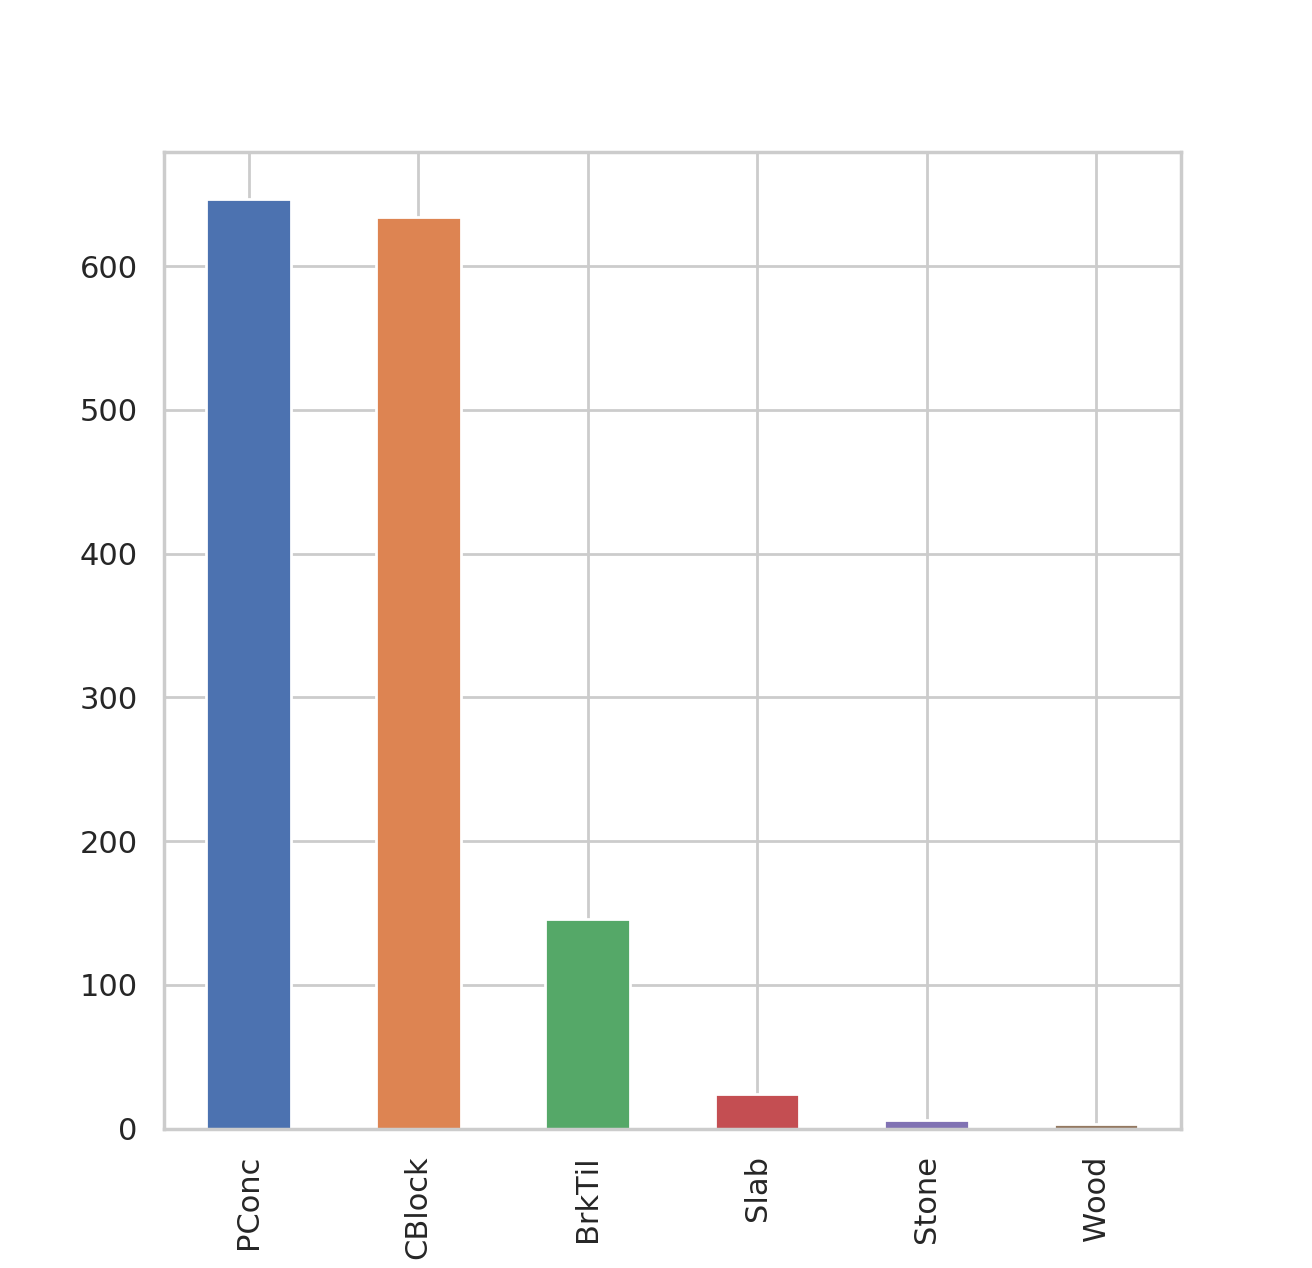

In [21]:
analysis("Foundation")

### Functional
- Home functionality (Assume typical unless deductions are warranted)
       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only

Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64


<IPython.core.display.Javascript object>


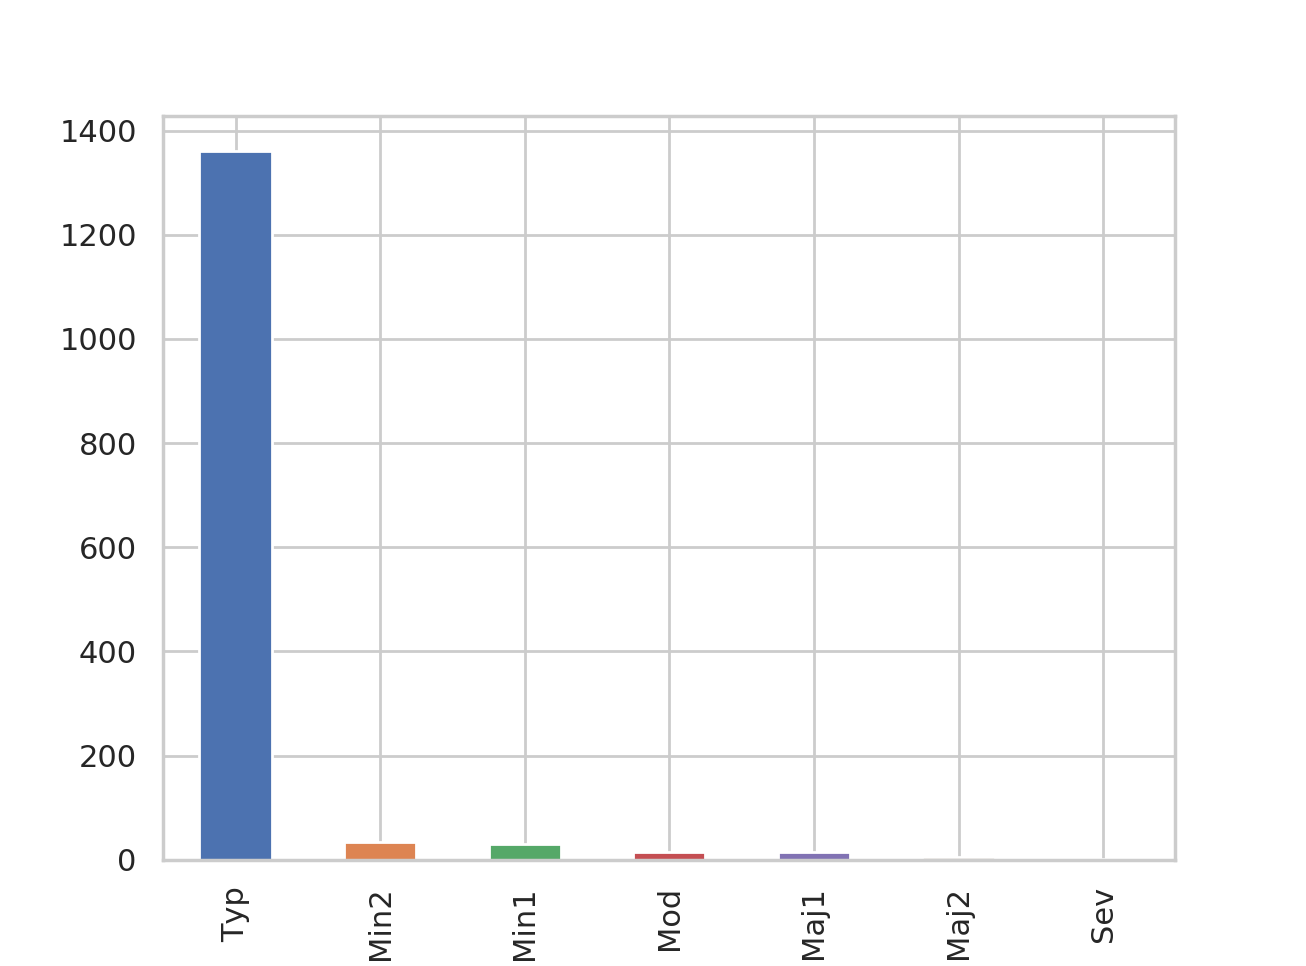

In [22]:
analysis("Functional")

### GarageCond
- Garage condition
       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

TA     1326
NaN      81
Fa       35
Gd        9
Po        7
Ex        2
Name: GarageCond, dtype: int64


<IPython.core.display.Javascript object>


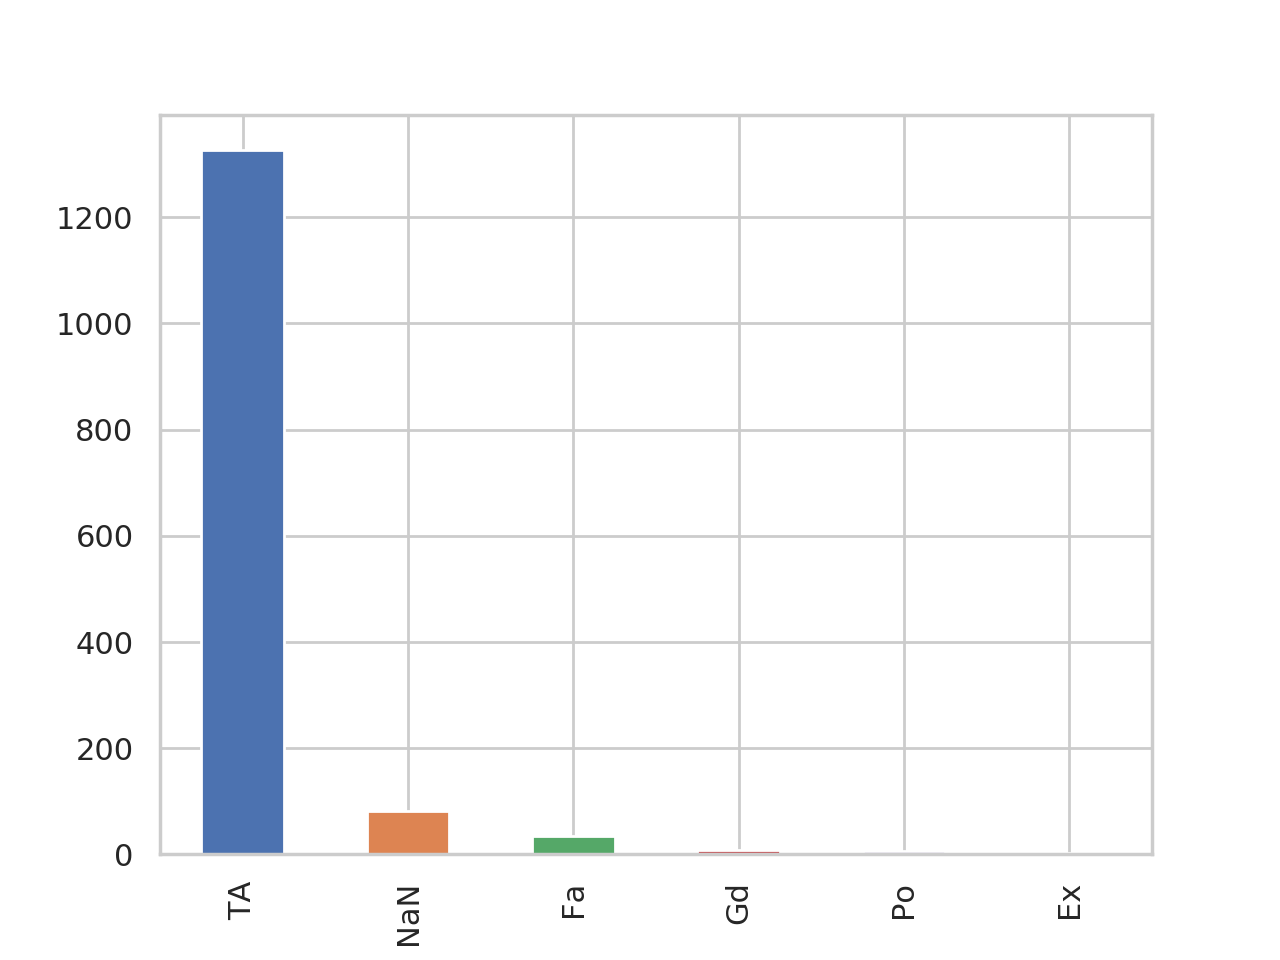

In [23]:
analysis("GarageCond")

### GarageFinish
- Interior finish of the garage
       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage

Unf    605
RFn    422
Fin    352
NaN     81
Name: GarageFinish, dtype: int64


<IPython.core.display.Javascript object>


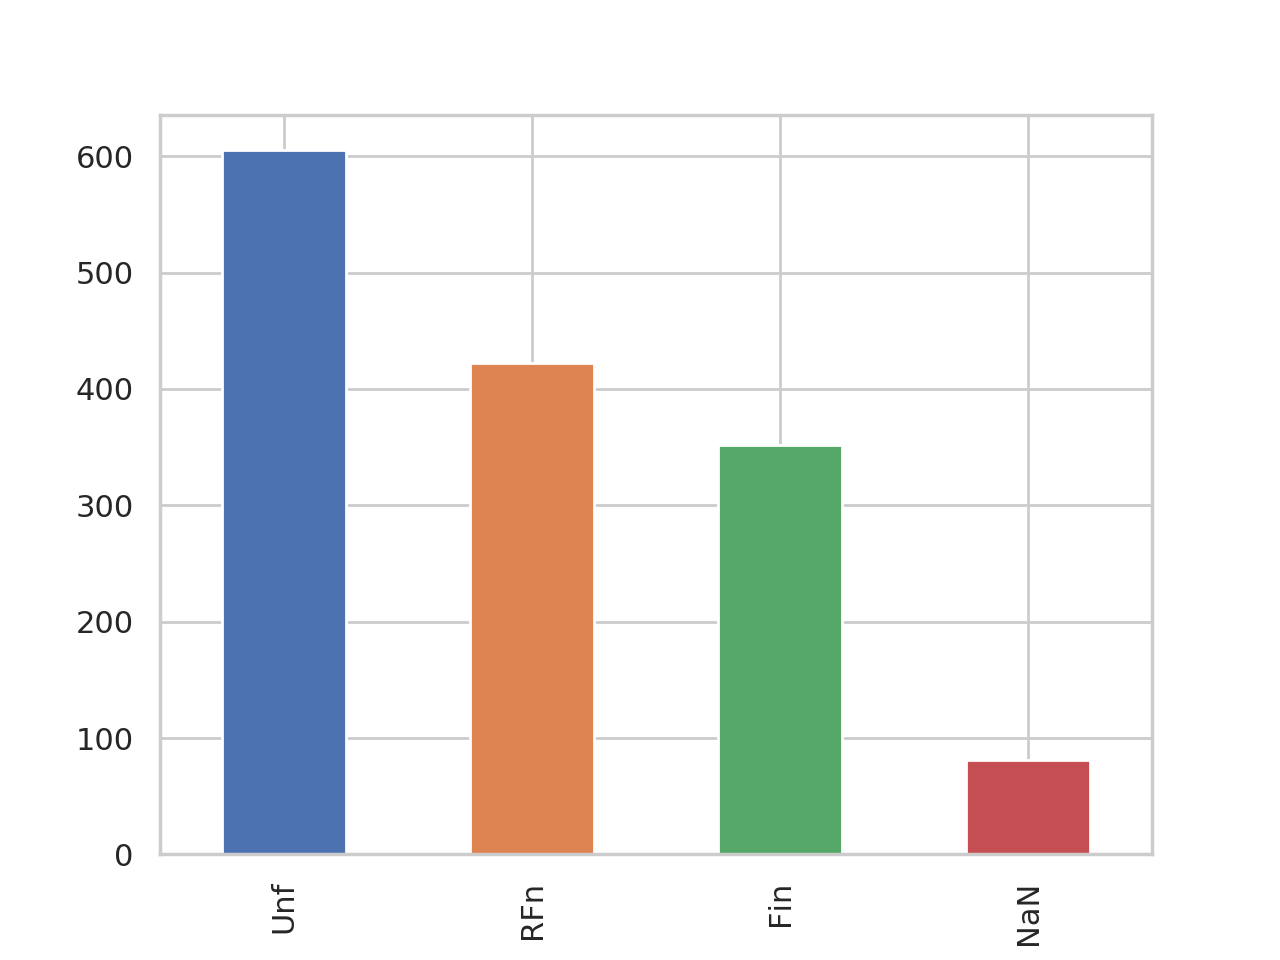

In [24]:
analysis("GarageFinish")

### GarageQual
- Garage quality
       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

TA     1311
NaN      81
Fa       48
Gd       14
Po        3
Ex        3
Name: GarageQual, dtype: int64


<IPython.core.display.Javascript object>


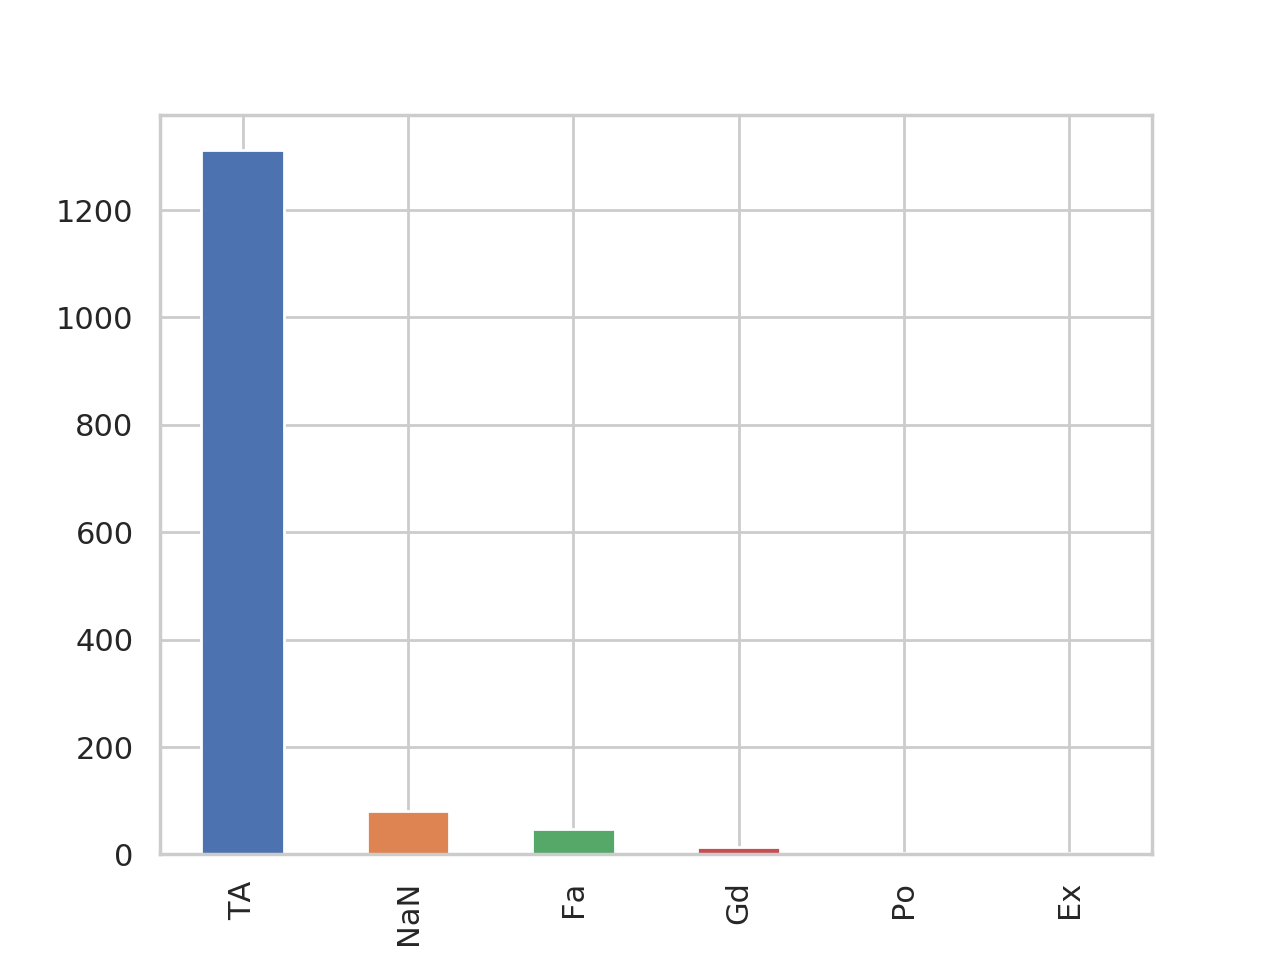

In [25]:
analysis("GarageQual")

### GarageType
- Garage location
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage

Attchd     870
Detchd     387
BuiltIn     88
NaN         81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64


<IPython.core.display.Javascript object>


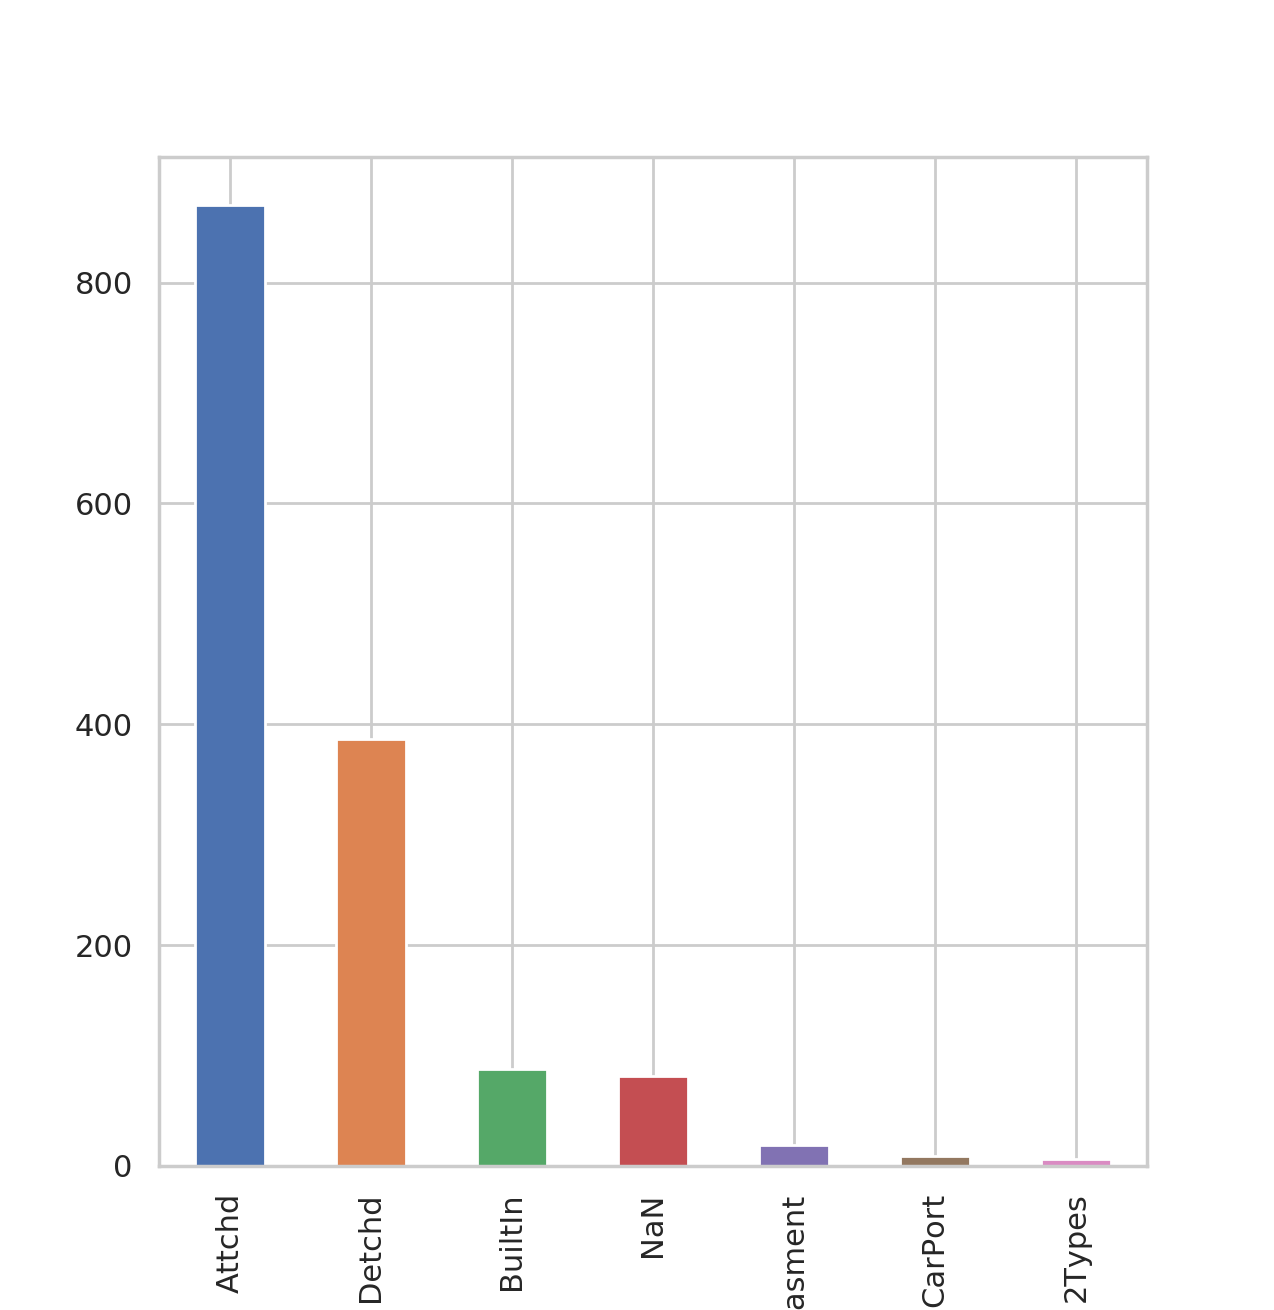

In [26]:
analysis('GarageType')

### LotShape
- 일반적인 토지 모양
       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular

In [101]:
lotshape = df['LotShape']
lotshape = lotshape.astype('category')
lotshape = lotshape.cat.set_categories(['Reg', 'IR1' ,'IR2', 'IR3'])
lotshape_result = lotshape.value_counts()

<IPython.core.display.Javascript object>


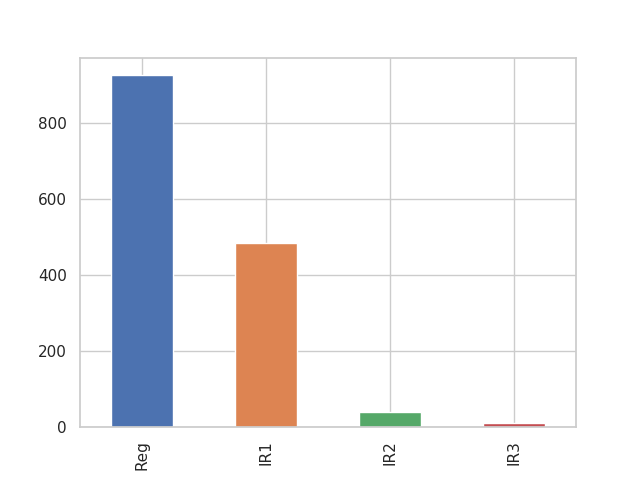

In [103]:
lotshape_result.plot.bar()

### LandContour
- 토지가 평평한지
       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building(거리에서 건물까지 빠르게 올라갈 수 있다)
       HLS	Hillside - Significant slope from side to side
       Low	Depression

In [107]:
landcontour = df['LandContour']
landcontour = landcontour.astype('category')
landcontour = landcontour.cat.set_categories(['Lvl', 'Bnk' ,'HLS', 'Low'])
landcontour_result = landcontour.value_counts()
landcontour_result

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

<IPython.core.display.Javascript object>


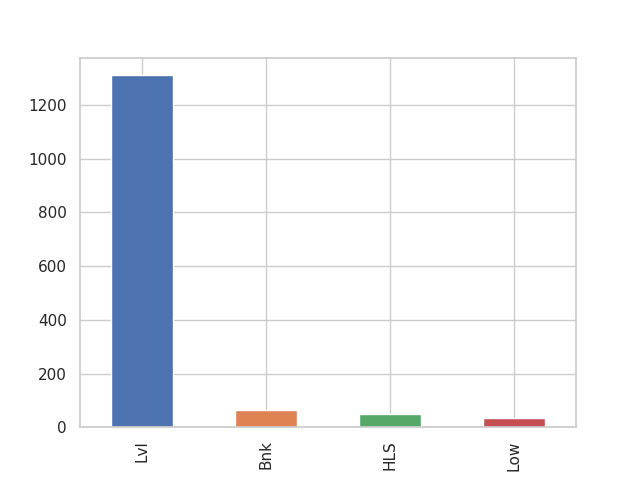

In [106]:
landcontour_result.plot.bar()

## 회귀분석

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols

In [271]:
str1 = "FstFlrSF, SndFlrSF, TSsnPorch, BedroomAbvGr, BsmtFinSF1, BsmtFinSF2, BsmtFullBath, BsmtHalfBath, BsmtUnfSF, EnclosedPorch, Fireplaces, FullBath, GarageArea, GarageCars, GarageYrBlt, GrLivArea, HalfBath, KitchenAbvGr, LotArea, LotFrontage, LowQualFinSF, MSSubClass, MasVnrArea, MiscVal, MoSold, OpenPorchSF, OverallCond, OverallQual, PoolArea, ScreenPorch, TotRmsAbvGrd, TotalBsmtSF, WoodDeckSF, YearBuilt, YearRemodAdd, YrSold"
str1 = str1.split(",")

In [269]:
for i in range(len(str1)):
    str1[i] = str1[i].strip()
    
quan = " + ".join(str1)

In [272]:
for i in range(len(str1)):
    str1[i] = "scale(" + str1[i].strip() + ")"
    
quan_scale = " + ".join(str1)

In [270]:
quan

'FstFlrSF + SndFlrSF + TSsnPorch + BedroomAbvGr + BsmtFinSF1 + BsmtFinSF2 + BsmtFullBath + BsmtHalfBath + BsmtUnfSF + EnclosedPorch + Fireplaces + FullBath + GarageArea + GarageCars + GarageYrBlt + GrLivArea + HalfBath + KitchenAbvGr + LotArea + LotFrontage + LowQualFinSF + MSSubClass + MasVnrArea + MiscVal + MoSold + OpenPorchSF + OverallCond + OverallQual + PoolArea + ScreenPorch + TotRmsAbvGrd + TotalBsmtSF + WoodDeckSF + YearBuilt + YearRemodAdd + YrSold'

In [273]:
quan_scale

'scale(FstFlrSF) + scale(SndFlrSF) + scale(TSsnPorch) + scale(BedroomAbvGr) + scale(BsmtFinSF1) + scale(BsmtFinSF2) + scale(BsmtFullBath) + scale(BsmtHalfBath) + scale(BsmtUnfSF) + scale(EnclosedPorch) + scale(Fireplaces) + scale(FullBath) + scale(GarageArea) + scale(GarageCars) + scale(GarageYrBlt) + scale(GrLivArea) + scale(HalfBath) + scale(KitchenAbvGr) + scale(LotArea) + scale(LotFrontage) + scale(LowQualFinSF) + scale(MSSubClass) + scale(MasVnrArea) + scale(MiscVal) + scale(MoSold) + scale(OpenPorchSF) + scale(OverallCond) + scale(OverallQual) + scale(PoolArea) + scale(ScreenPorch) + scale(TotRmsAbvGrd) + scale(TotalBsmtSF) + scale(WoodDeckSF) + scale(YearBuilt) + scale(YearRemodAdd) + scale(YrSold)'

- 범주형 변수

In [260]:
str2 = "Alley, BldgType, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, BsmtQual, CentralAir, Condition1, Electrical, ExterCond, ExterQual, Exterior1st, Exterior2nd, Fence, FireplaceQu, Foundation, Functional, GarageCond, GarageFinish, GarageQual, GarageType, Heating, HeatingQC, HouseStyle, KitchenQual, LandContour, LandSlope, LotConfig, LotShape, MSZoning, MasVnrType, MiscFeature, Neighborhood, PavedDrive, PoolQC, RoofMatl, RoofStyle, SaleCondition, SaleType, Street, Utilities,"
str2 = str2.split(",")
str2 = str2[:-1]

In [262]:
len(str2)

42

In [263]:
for i in range(len(str2)):
    str2[i] = "C(" + str2[i].strip() + ")"

qual = " + ".join(str2)

In [274]:
x = "SalePrice ~ " + quan + " + " + qual
x_scale = "SalePrice ~ " + quan_scale + " + " + qual
# x = "SalePrice ~ " + quan
x

'SalePrice ~ FstFlrSF + SndFlrSF + TSsnPorch + BedroomAbvGr + BsmtFinSF1 + BsmtFinSF2 + BsmtFullBath + BsmtHalfBath + BsmtUnfSF + EnclosedPorch + Fireplaces + FullBath + GarageArea + GarageCars + GarageYrBlt + GrLivArea + HalfBath + KitchenAbvGr + LotArea + LotFrontage + LowQualFinSF + MSSubClass + MasVnrArea + MiscVal + MoSold + OpenPorchSF + OverallCond + OverallQual + PoolArea + ScreenPorch + TotRmsAbvGrd + TotalBsmtSF + WoodDeckSF + YearBuilt + YearRemodAdd + YrSold + C(Alley) + C(BldgType) + C(BsmtCond) + C(BsmtExposure) + C(BsmtFinType1) + C(BsmtFinType2) + C(BsmtQual) + C(CentralAir) + C(Condition1) + C(Electrical) + C(ExterCond) + C(ExterQual) + C(Exterior1st) + C(Exterior2nd) + C(Fence) + C(FireplaceQu) + C(Foundation) + C(Functional) + C(GarageCond) + C(GarageFinish) + C(GarageQual) + C(GarageType) + C(Heating) + C(HeatingQC) + C(HouseStyle) + C(KitchenQual) + C(LandContour) + C(LandSlope) + C(LotConfig) + C(LotShape) + C(MSZoning) + C(MasVnrType) + C(MiscFeature) + C(Neighbo

## NAN값 처리

In [205]:
df = pd.read_csv("train.csv")

In [206]:
df = df.rename({"1stFlrSF": "FstFlrSF",
           "2ndFlrSF": "SndFlrSF", 
           "3SsnPorch": "TSsnPorch"}, axis = "columns")

In [207]:
np.mean(df['MasVnrArea'])

103.68526170798899

In [208]:
df['Electrical'].mode().values

array(['SBrkr'], dtype=object)

In [209]:
df[['Alley','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PoolQC','Fence','MiscFeature','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtQual','BsmtCond']] = df[['Alley','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PoolQC','Fence','MiscFeature','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtQual','BsmtCond']].fillna('noexist')
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0)
df['BsmtExposure'][948] = "No"
df['LotFrontage'] = df['LotFrontage'].fillna(0)
df['MasVnrType'] = df['MasVnrType'].fillna("None")
df['MasVnrArea'] = df['MasVnrArea'].fillna(np.mean(df["MasVnrArea"]))
df['Electrical'] = df['Electrical'].fillna('SBrkr')

In [210]:
df = df.drop("Condition2", axis=1)

In [211]:
train, test = train_test_split(df, test_size=0.2, random_state=0)

In [212]:
len(train.columns)

80

In [275]:
# Quantity 값 전체를 ols 돌린 결과 (train)
result_quan = ols(formula=x, data=train).fit()
print(result_quan.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     48.20
Date:                Sat, 10 Nov 2018   Prob (F-statistic):               0.00
Time:                        18:34:55   Log-Likelihood:                -13305.
No. Observations:                1168   AIC:                         2.709e+04
Df Residuals:                     928   BIC:                         2.831e+04
Df Model:                         239                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [276]:
# Quantity 값 전체를 ols 돌린 결과 (train)
result_quan = ols(formula=x_scale, data=train).fit()
print(result_quan.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     48.20
Date:                Sat, 10 Nov 2018   Prob (F-statistic):               0.00
Time:                        18:35:24   Log-Likelihood:                -13305.
No. Observations:                1168   AIC:                         2.709e+04
Df Residuals:                     928   BIC:                         2.831e+04
Df Model:                         239                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [214]:
str1 = "FstFlrSF, SndFlrSF, TSsnPorch, BedroomAbvGr, BsmtFinSF1, BsmtFinSF2, BsmtFullBath, BsmtHalfBath, BsmtUnfSF, EnclosedPorch, Fireplaces, FullBath, GarageArea, GarageCars, GarageYrBlt, GrLivArea, HalfBath, KitchenAbvGr, LotArea, LotFrontage, LowQualFinSF, MSSubClass, MasVnrArea, MiscVal, MoSold, OpenPorchSF, OverallCond, OverallQual, PoolArea, ScreenPorch, TotRmsAbvGrd, TotalBsmtSF, WoodDeckSF, YearBuilt, YearRemodAdd, YrSold,"
str2 = "Alley, BldgType, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, BsmtQual, CentralAir, Condition1, Condition2, Electrical, ExterCond, ExterQual, Exterior1st, Exterior2nd, Fence, FireplaceQu, Foundation, Functional, GarageCond, GarageFinish, GarageQual, GarageType, Heating, HeatingQC, HouseStyle, KitchenQual, LandContour, LandSlope, LotConfig, LotShape, MSZoning, MasVnrType, MiscFeature, Neighborhood, PavedDrive, PoolQC, RoofMatl, RoofStyle, SaleCondition, SaleType, Street, Utilities"
total_str = str1 + str2

In [215]:
total_str = total_str.split(",")

In [216]:
total_str

['FstFlrSF',
 ' SndFlrSF',
 ' TSsnPorch',
 ' BedroomAbvGr',
 ' BsmtFinSF1',
 ' BsmtFinSF2',
 ' BsmtFullBath',
 ' BsmtHalfBath',
 ' BsmtUnfSF',
 ' EnclosedPorch',
 ' Fireplaces',
 ' FullBath',
 ' GarageArea',
 ' GarageCars',
 ' GarageYrBlt',
 ' GrLivArea',
 ' HalfBath',
 ' KitchenAbvGr',
 ' LotArea',
 ' LotFrontage',
 ' LowQualFinSF',
 ' MSSubClass',
 ' MasVnrArea',
 ' MiscVal',
 ' MoSold',
 ' OpenPorchSF',
 ' OverallCond',
 ' OverallQual',
 ' PoolArea',
 ' ScreenPorch',
 ' TotRmsAbvGrd',
 ' TotalBsmtSF',
 ' WoodDeckSF',
 ' YearBuilt',
 ' YearRemodAdd',
 ' YrSold',
 'Alley',
 ' BldgType',
 ' BsmtCond',
 ' BsmtExposure',
 ' BsmtFinType1',
 ' BsmtFinType2',
 ' BsmtQual',
 ' CentralAir',
 ' Condition1',
 ' Condition2',
 ' Electrical',
 ' ExterCond',
 ' ExterQual',
 ' Exterior1st',
 ' Exterior2nd',
 ' Fence',
 ' FireplaceQu',
 ' Foundation',
 ' Functional',
 ' GarageCond',
 ' GarageFinish',
 ' GarageQual',
 ' GarageType',
 ' Heating',
 ' HeatingQC',
 ' HouseStyle',
 ' KitchenQual',
 ' LandC

In [217]:
ls = []
for i in total_str:
    ls.append(i.strip())

In [218]:
len(ls)

79

In [219]:
ls

['FstFlrSF',
 'SndFlrSF',
 'TSsnPorch',
 'BedroomAbvGr',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtUnfSF',
 'EnclosedPorch',
 'Fireplaces',
 'FullBath',
 'GarageArea',
 'GarageCars',
 'GarageYrBlt',
 'GrLivArea',
 'HalfBath',
 'KitchenAbvGr',
 'LotArea',
 'LotFrontage',
 'LowQualFinSF',
 'MSSubClass',
 'MasVnrArea',
 'MiscVal',
 'MoSold',
 'OpenPorchSF',
 'OverallCond',
 'OverallQual',
 'PoolArea',
 'ScreenPorch',
 'TotRmsAbvGrd',
 'TotalBsmtSF',
 'WoodDeckSF',
 'YearBuilt',
 'YearRemodAdd',
 'YrSold',
 'Alley',
 'BldgType',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtQual',
 'CentralAir',
 'Condition1',
 'Condition2',
 'Electrical',
 'ExterCond',
 'ExterQual',
 'Exterior1st',
 'Exterior2nd',
 'Fence',
 'FireplaceQu',
 'Foundation',
 'Functional',
 'GarageCond',
 'GarageFinish',
 'GarageQual',
 'GarageType',
 'Heating',
 'HeatingQC',
 'HouseStyle',
 'KitchenQual',
 'LandContour',
 'LandSlope',
 'LotConfig',
 'LotShape',
 'MSZoning',

In [220]:
ls.remove("Condition2")

In [221]:
ls

['FstFlrSF',
 'SndFlrSF',
 'TSsnPorch',
 'BedroomAbvGr',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtUnfSF',
 'EnclosedPorch',
 'Fireplaces',
 'FullBath',
 'GarageArea',
 'GarageCars',
 'GarageYrBlt',
 'GrLivArea',
 'HalfBath',
 'KitchenAbvGr',
 'LotArea',
 'LotFrontage',
 'LowQualFinSF',
 'MSSubClass',
 'MasVnrArea',
 'MiscVal',
 'MoSold',
 'OpenPorchSF',
 'OverallCond',
 'OverallQual',
 'PoolArea',
 'ScreenPorch',
 'TotRmsAbvGrd',
 'TotalBsmtSF',
 'WoodDeckSF',
 'YearBuilt',
 'YearRemodAdd',
 'YrSold',
 'Alley',
 'BldgType',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtQual',
 'CentralAir',
 'Condition1',
 'Electrical',
 'ExterCond',
 'ExterQual',
 'Exterior1st',
 'Exterior2nd',
 'Fence',
 'FireplaceQu',
 'Foundation',
 'Functional',
 'GarageCond',
 'GarageFinish',
 'GarageQual',
 'GarageType',
 'Heating',
 'HeatingQC',
 'HouseStyle',
 'KitchenQual',
 'LandContour',
 'LandSlope',
 'LotConfig',
 'LotShape',
 'MSZoning',
 'MasVnrType',

In [222]:
# test_f = test.drop(['SalePrice', 'Id'], 1)
test_f = test[ls]

In [239]:
test_f = test_f[test_f["Functional"] != "Sev"]
test_f = test_f[test_f["MiscFeature"] != "TenC"]
test_f = test_f[test_f["RoofMatl"] != "ClyTile"]

In [246]:
ypred = result_quan.predict(test_f)

In [247]:
predict_df = pd.DataFrame(ypred)

In [248]:
test_df = pd.DataFrame(test["SalePrice"])

<IPython.core.display.Javascript object>


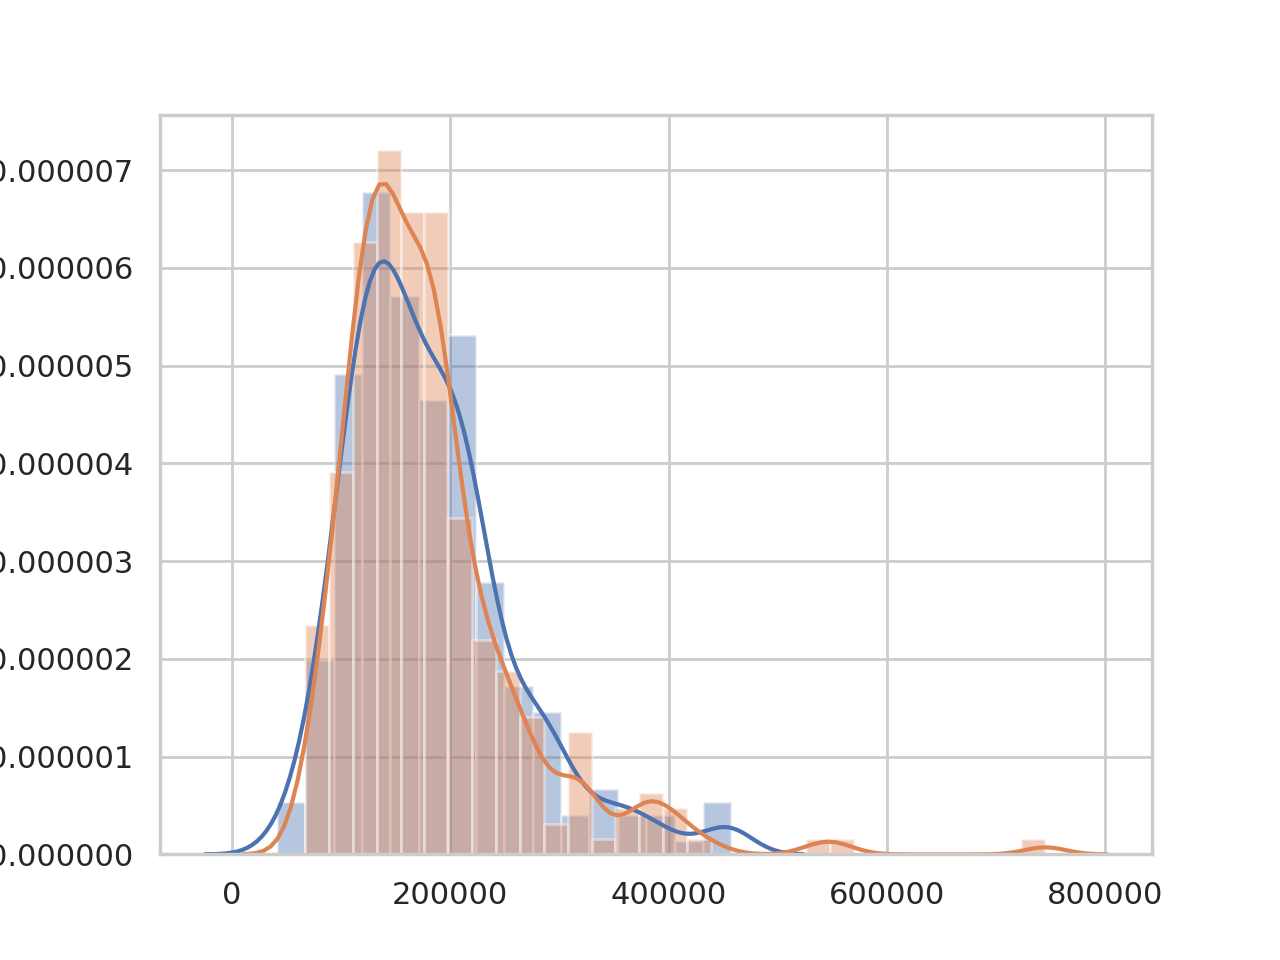

In [243]:
sns.distplot(predict_df[predict_df.notnull().all(axis=1)])

In [244]:
sns.distplot(test_df)

In [249]:
result = pd.concat([predict_df, test_df], axis=1)
# sns.distplot(result[result.notnull().all(axis=1)][0])

<IPython.core.display.Javascript object>


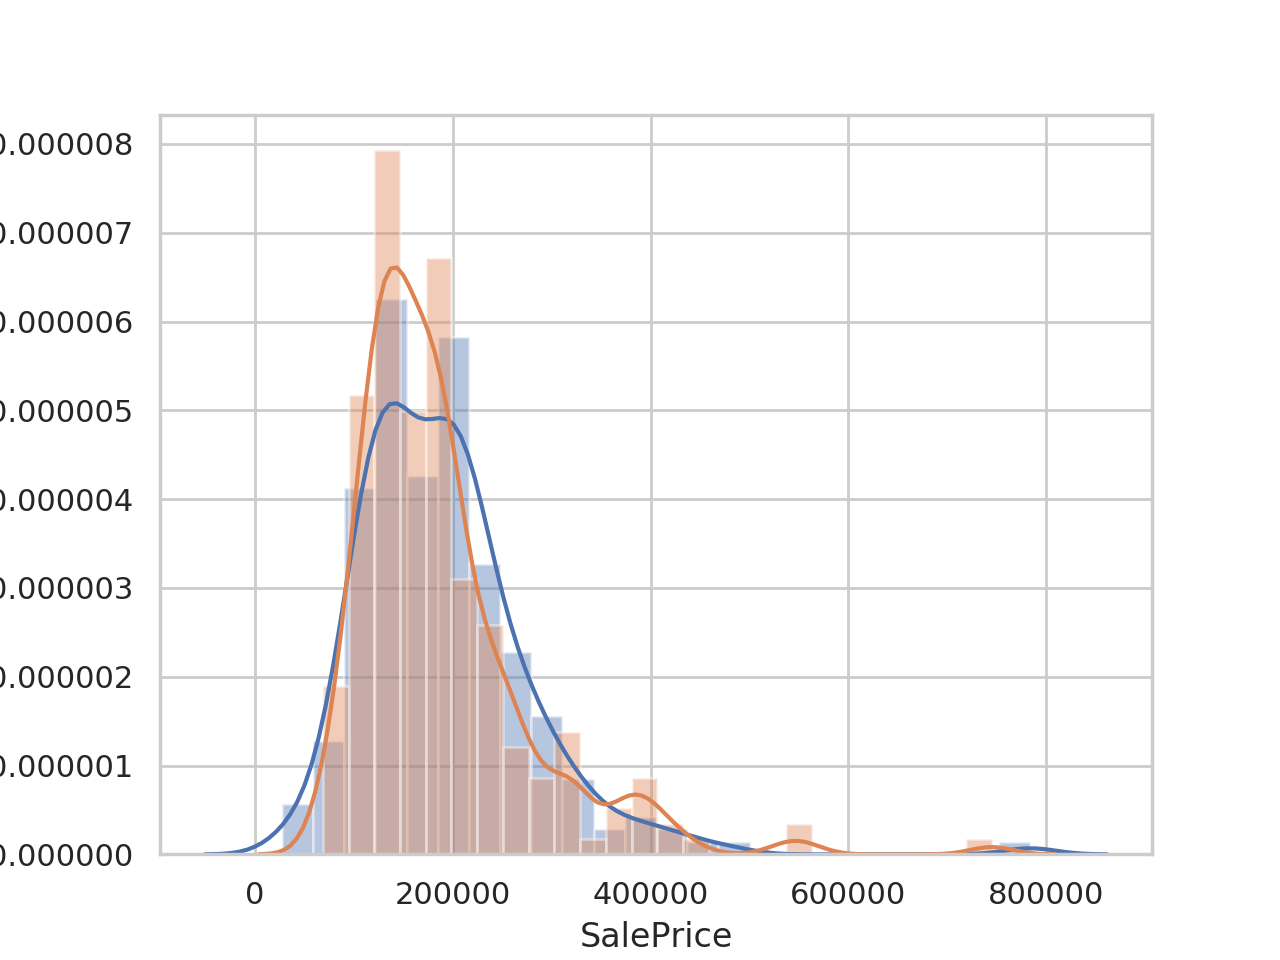

In [103]:
sns.distplot(result[result.notnull().all(axis=1)][0])

In [107]:
sns.distplot(result[result.notnull().all(axis=1)]["SalePrice"])

In [250]:
result

0  SalePrice
1     208569.590046     181500
2     203667.979758     223500
4     298622.009826     250000
5     178563.220827     143000
9     120804.090692     118000
14    152657.302552     157000
18    149745.789680     159000
19    115742.914876     139000
27    298085.125982     306000
29     68493.541574      68500
31    145763.622915     149350
34    301359.146264     277500
39     91061.154583      82000
45    309256.599051     319900
47    237672.541246     249700
52    115594.109877     110000
53    373321.620850     385000
54    100893.006222     130000
55    179172.970132     180500
56    201132.879445     172500
58    457660.514782     438780
61    114522.806758     101000
80    203213.624593     193500
85    286746.476469     260000
89    136231.589426     123600
96    204250.872903     214000
107    53130.512011     115000
108   129998.141614     115000
113   235703.787395     217000
122   136867.456252     136000
...             ...        ...
1298            NaN     160000
1300  237521.849018     225000
1301  165890.969504     177500
1307  144520.369554     138000
1317  210789.357651     208900
1318  269745.502328     275000
1320  178264.092699     156500
1322  256441.917526     190000
1323  110969.981398      82500
1335  169409.511476     167900
1338  218060.615923     200000
1339  128572.461641     128500
1340  113232.679828     123000
1348  241823.506095     215000
1350  210021.916715     200000
1351  169975.436842     171000
1355  179636.303399     170000
1358  162246.881361     177500
1359  330146.273220     315000
1386            NaN     250000
1387  262923.560810     136000
1392  101020.152363     123000
1402  200796.643968     193879
1403  265947.555317     282922
1404  101029.293338     105000
1415  212294.970440     175900
1427  125533.411103     140000
1429  196420.214094     182900
1450  123783.088001     136000
1452  114676.904637     145000

[292 rows x 2 columns]

In [251]:
result_notnull = result[result.notnull().all(axis=1)]

In [252]:
corr = result_notnull.corr(method = 'pearson')

In [253]:
corr

0  SalePrice
0          1.000000   0.928277
SalePrice  0.928277   1.000000